***
***
***

#**PROJETO MÓDULO 1 - Dados Covid-19 - Dados fonte: Brasil-io** 
#**Bootcamp Data Science Alura** 

***
***
***

Autora: Vanessa Orsi Gordo

Email: vanessaorsigordo@gmail.com

LinkedIn: https://www.linkedin.com/in/vanessa-orsi-gordo-a354079a/

***


## **Proposta da equipe Alura de projeto**
Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.

E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.


## Resumo:

Este projeto analisou o comportamento do número de morte e contaminados pelo Covid-19 nos estados brasileiros no período do primeiro diagnóstico de Covid-19 no Brasil, até o dia 09 de novembro de 2020. Adicionalmente foi analisado o número de óbitos em 2020 por insuficiência respiratória, pneumonia, SRAG e mortes indeterminadas/outros comparando este número ao mesmo período de 2019. Para esta análise foi utilizado duas bases de dados do Brasil-IO.

Este estudo identificou possíveis casos de subnotificações de Covid-19, identificou também casos de falta de registro de dados por estados em dias específicos e um grande aumento no número de mortes em 2020 por síndrome respiratória aguda grave (SRAG) em comparação com 2019. 

Com base nesta análise foi possível detectar que o estado do Rio de Janeiro apresenta a mais alta taxa de letalidade do Brasil, seguido de Pernambuco. Foi verificado que há estados que não registram os dados em dias específicos como é o caso do Rio Grande do Norte, que quase todos os sábados em Agosto, Setembro e Outubro não fez o registro. Além disto, foi identificado um aumento expressivo de SRAG para os estados de Maranhão que registrou um aumento de 16520%, Pernambuco com 10746% seguido do Pará com 2534%.

Todo este estudo sustenta a possível falta de testagem e/ou falha dos hospitais públicos quanto a condições de atenderem casos graves. A falta de testagem e a sua subnotifição escondem dados reais de Covid-19, dificultando, desta forma, o enfrentamento do problema de forma mais adaptada e adequada a cada estado.

## Sobre os dados:

### **COVID-19**
Essa tabela tem apenas os casos relatados pelos boletins das Secretarias Estaduais de Saúde 
- Fonte: Dados acessados no site do Brasil.io
https://brasil.io/dataset/covid19/caso/
Acesso em: 09 Nov 2020 as 15:10
- Fonte original:
Secretarias de Saúde das Unidades Federativas, dados tratados por Álvaro Justen e colaboradores/Brasil.IO
e estão sob a licença Creative Commons Attribution ShareAlike
- arquivo: caso.csv.gz

### **ÓBITOS - CARTÓRIO**
Essa tabela contém dados de óbitos registrados nos cartórios e disponíveis no Portal da Transparência do Registro Civil
- Fonte: Dados acessados no site do Brasil.io
https://brasil.io/dataset/covid19/obito_cartorio/
Acesso em: 19 Nov 2020 as 10:21
- Fonte original:
Secretarias de Saúde das Unidades Federativas, dados tratados por Álvaro Justen e colaboradores/Brasil.IO
e estão sob a licença Creative Commons Attribution ShareAlike
- arquivo: obito_cartorio.csv.gz

[1] Disponível em: https://brasil.io/dataset/covid19/caso/ Acesso em: 09 Nov. 2020

[2] Disponível em: https://brasil.io/dataset/covid19/obito_cartorio/ Acesso em: 19 Nov. 2020 

## Importanto as Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import datetime
#Biblioteca para gráfica
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Definindo funções

**Para análise dos dados**

In [24]:
def assess_NA(data):
    """
    Retorna um dataframe pandas denotando o número total de valores NA e a porcentagem de valores NA em cada coluna.
    Os nomes das colunas são anotados no índice.

    fonte link site: https://towardsdatascience.com/cleaning-missing-values-in-a-pandas-dataframe-a88b3d1a66bf

    Parâmetros
    ----------
    data: dataframe
    """
    # série pandas denotando recursos e a soma de seus valores nulos
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenar ao longo das colunas para criar o dataframe completo
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # elimine linhas que não tenham dados ausentes; omita se você quiser manter todas as linhas
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA
#[26] Andrei Teleron. Cleaning Missing Values in a Pandas Dataframe. Towards Data Science, 09 nov. 2019. Disponível em: https://towardsdatascience.com/cleaning-missing-values-in-a-pandas-dataframe-a88b3d1a66bf Acesso em: 09 Nov 2020 as 15:20

**Para plotar os gráficos**

In [20]:
def plotagem_evolucao_covid(dado, eixox1, eixoy1, tonalidade1,
             titulo1,
             nome_eixox1, nome_eixoy1,
             eixox2, eixoy2, tonalidade2,
             titulo2,
             nome_eixox2, nome_eixoy2):

############################### criar figura ###################################
    plt.figure(figsize=(12,10))
############################# plotar o gráfico #################################

    ax = plt.subplot(2,1,1)

    sns.lineplot(data = dado, x=eixox1, y=eixoy1, hue= tonalidade1, linestyle="-", linewidth="3")

########################## Estética do gráfico 1 ###############################
    plt.legend(loc = "upper left", borderaxespad=0.5) #posiciona a legenda
    plt.title(titulo1, fontsize = 16, fontweight = "bold") # adiciona título
    plt.xlabel(nome_eixox1,fontsize = 14, fontweight = "bold") #nomeia x
    plt.ylabel(nome_eixoy1,fontsize = 14, fontweight = "bold") #nomeia y

    plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
    plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

    plt.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

############################ plotar o gráfico 2 ################################

    ax = plt.subplot(2,1,2)

    sns.lineplot(data = dado, x=eixox2, y=eixoy2, hue=tonalidade2, linestyle="-", linewidth="3")

########################## Estética do gráfico 2 ###############################

    plt.legend(loc = "upper left", borderaxespad=0.5) #posiciona a legenda
    plt.title(titulo2, fontsize = 16, fontweight = "bold") # adiciona título
    plt.xlabel(nome_eixox2,fontsize = 14, fontweight = "bold") #nomeia x
    plt.ylabel(nome_eixoy2,fontsize = 14, fontweight = "bold") #nomeia y

    plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
    plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

    plt.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

    plt.tight_layout()
    plt.show()
    return ax

In [21]:
def plotagem_evolucao_covid_lado_a_lado(subtitulo, dados, 
                                        eixox1, eixoy1, tonalidade1, titulo1,nome_eixox1, nome_eixoy1,
                                        eixox2, eixoy2, tonalidade2, titulo2, nome_eixox2, nome_eixoy2, ajuste_top_subtitulo):

############################### criar figura ###################################
    plt.figure(figsize=(12,10))
    plt.suptitle(subtitulo,fontsize = 16, fontweight = "bold")
############################# plotar o gráfico #################################
    ax = plt.subplot(221)
    sns.lineplot(data=dados, x=eixox1, y=eixoy1, hue=tonalidade1,linestyle="-", linewidth="3")

########################## Estética do gráfico 1 ###############################

    plt.legend(loc = "upper left", borderaxespad=0.5) #posiciona a legenda
    plt.title(titulo1, fontsize = 16, fontweight = "bold") # adiciona título
    plt.xlabel(nome_eixox1,fontsize = 14, fontweight = "bold") #nomeia x
    plt.ylabel(nome_eixoy1,fontsize = 14, fontweight = "bold") #nomeia y

    plt.tick_params(axis="x", labelsize=12, labelrotation=30) #modifica o tamanho do tick em x
    plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

    plt.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

############################ plotar o gráfico 2 ################################

    ax = plt.subplot(222)
    sns.lineplot(data=dados, x=eixox2, y=eixoy2, hue=tonalidade2,linestyle="-", linewidth="3")

########################## Estética do gráfico 2 ###############################

    plt.legend(loc = "upper left", borderaxespad=0.5) #posiciona a legenda
    plt.title(titulo2, fontsize = 16, fontweight = "bold") # adiciona título
    plt.xlabel(nome_eixox2,fontsize = 14, fontweight = "bold") #nomeia x
    plt.ylabel(nome_eixoy2,fontsize = 14, fontweight = "bold") #nomeia y

    plt.tick_params(axis="x", labelsize=12, labelrotation=30) #modifica o tamanho do tick em x
    plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

    plt.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

    plt.tight_layout()
    plt.subplots_adjust(top=ajuste_top_subtitulo)
    plt.show()
    return ax

In [22]:
def plotagem_barh_lado_a_lado(fig_tamX, fig_tamY,subtitulo,eixox1, eixoy1, titulo1,nome_eixox1, nome_eixoy1, lim_min_eixo_x1, lim_max_eixo_x1,
                              eixox2, eixoy2, titulo2, nome_eixox2, lim_min_eixo_x2, lim_max_eixo_x2, ajuste_top_subtitulo):

# plt.subplot(nrows, ncols, plot_number)
############################### criar figura ###################################
    plt.figure(figsize=(fig_tamX,fig_tamY))
    plt.suptitle(subtitulo, fontsize = 16, fontweight = "bold")
############################# plotar gráfico 1 #################################
    ax = plt.subplot(1,2,1)
    plt.barh(eixox1, eixoy1, height = 0.9, color = "blue")
########################## Estética do gráfico 1 ###############################
    plt.title(titulo1, fontsize = 16, fontweight = "bold") # adiciona título
    plt.xlabel(nome_eixox1,fontsize = 14, fontweight = "bold") #nomeia x
    plt.ylabel(nome_eixoy1,fontsize = 14, fontweight = "bold") #nomeia y

    plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
    plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

    plt.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

    plt.xlim(lim_min_eixo_x1, eixoy1.max()*lim_max_eixo_x1)#aumentei o limite do eixo x para caber a legenda de cada barra sem ficar sobre o eixo
    plt.ylim(-0.9,len(eixox1))#ajustei o limite do eixo y para não sobrar espaço demais

#rotina para adicionar o número em frente cada barra
    for index, value in enumerate(eixoy1.round(2)):
        plt.text(value, index, str(value), color='black', fontweight="bold", fontsize=12, verticalalignment='center')

############################# plotar gráfico 2 #################################
    ax = plt.subplot(1,2,2)
    plt.barh(eixox2, eixoy2, height = 0.9, color = "blue")
########################## Estética do gráfico 2 ###############################

    plt.title(titulo2, fontsize = 16, fontweight = "bold") # adiciona título
    plt.xlabel(nome_eixox2,fontsize = 14, fontweight = "bold") #nomeia x

    plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
    plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

    plt.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

    plt.xlim(lim_min_eixo_x2,eixoy2.max()*lim_max_eixo_x2)#aumentei o limite do eixo x para caber a legenda de cada barra sem ficar sobre o eixo
    plt.ylim(-0.9,len(eixox2))#ajustei o limite do eixo y para não sobrar espaço demais

#rotina para adicionar o número em frente cada barra
    for index, value in enumerate(eixoy2.round(2)):
        plt.text(value, index, str(value), color='black', fontweight="bold", fontsize=12, verticalalignment='center')

    plt.tight_layout()
    plt.subplots_adjust(top=ajuste_top_subtitulo)
    plt.show()

    return ax

In [23]:
# Criando uma figura lado a lado Mortes em decorrência de Insuficiência Respiratória por Estado Período: 01-01 até 09-11-2020

def plotagem_barh_taxa(fig_tamX, fig_tamY, subtitulo,eixox1, eixoy1, titulo1,nome_eixox1, nome_eixoy1, 
                       lim_min_eixo_x1, lim_max_eixo_x1, variavel_barra_negativa1,
                       eixox2, eixoy2, titulo2, nome_eixox2, 
                       lim_min_eixo_x2, lim_max_eixo_x2, variavel_barra_negativa2, 
                       ajuste_top_subtitulo):

# plt.subplot(nrows, ncols, plot_number)
############################### criar figura ###################################
    plt.figure(figsize=(fig_tamX, fig_tamY))
    #escrever um título comum entre as duas figuras
    plt.suptitle(subtitulo, fontsize = 16, fontweight = "bold")
############################# plotar gráfico 1 #################################
    ax = plt.subplot(121)
    plt.barh(eixox1, eixoy1, height = 0.9,
             color =((eixoy1>0).map({True: "tomato", False: "dodgerblue"}))
             )
########################## Estética do gráfico 1 ###############################
    plt.title(titulo1, fontsize = 16, fontweight = "bold") # adiciona título
    plt.xlabel(nome_eixox1,fontsize = 14, fontweight = "bold") #nomeia x
    plt.ylabel(nome_eixoy1,fontsize = 14, fontweight = "bold") #nomeia y
    plt.axvline(x=0,linewidth=5, color="darkblue", label="Ponto crítico entre \n queda/aumento") #adiciona uma linha vertical em x=0

    plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
    plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

    plt.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

    plt.xlim(eixoy1.min()*lim_min_eixo_x1, eixoy1.max()*lim_max_eixo_x1)#aumentei o limite do eixo x para caber a legenda de cada barra sem ficar sobre o eixo
    plt.ylim(-0.9,len(eixox1))#ajustei o limite do eixo y para não sobrar espaço demais

    for index, value in enumerate(eixoy1.round(2)):
   #plt.text(posicao,altura,o que escrever, ...) 
        c=value
        if (c>0):
          c=0
        else:
          c=-(len(str(value))*variavel_barra_negativa1)
        plt.text(value+c, index, str(value),color='black', fontweight="bold", fontsize=12, verticalalignment='center')

    plt.legend()

############################# plotar gráfico 2 #################################
    ax = plt.subplot(122)
    plt.barh(eixox2, eixoy2, height = 0.9,
             color =((eixoy2>0).map({True: "tomato", False: "dodgerblue"}))
             )
########################## Estética do gráfico 2 ###############################

    plt.title(titulo2, fontsize = 16, fontweight = "bold") # adiciona título
    plt.xlabel(nome_eixox2,fontsize = 14, fontweight = "bold") #nomeia x
    plt.axvline(x=0,linewidth=5, color="darkblue", label="Ponto crítico entre \n queda/aumento") #adiciona uma linha vertical em x=0

    plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
    plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

    plt.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

    plt.xlim(eixoy2.min()*lim_min_eixo_x2,eixoy2.max()*lim_max_eixo_x2)#aumentei o limite do eixo x para caber a legenda de cada barra sem ficar sobre o eixo
    plt.ylim(-0.9,len(eixox2))#ajustei o limite do eixo y para não sobrar espaço demais

#rotina para adicionar o número em frente cada barra
    for index, value in enumerate(eixoy2.round(2)):
   #plt.text(posicao,altura,o que escrever, ...) 
        c=value
        if (c>0):
          c=0
        else:
          c=-(len(str(value))*variavel_barra_negativa2)
        plt.text(value+c, index, str(value),color='black', fontweight="bold", fontsize=12, verticalalignment='center')

    plt.tight_layout()
    plt.subplots_adjust(top=ajuste_top_subtitulo)
    plt.show()

    return ax
plt.show()

# **COVID -19**
fonte dos dados: Brasil.IO

## Importanto os Dados

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando o arquivo em formato gzip
dados_covid = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BootcampDataScience_Alura/caso.csv.gz', 
                 compression='gzip', na_values=['Importados/Indefinidos'])
#vamos mudar a forma de impressão - notação científica 
#para ele formatar ponto flutuante usar duas casas decimais 
pd.options.display.float_format = "{:.2f}".format
dados_covid.head(2)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-08,AP,NaN,state,53010,751,229,True,845731.00,861773.00,16.00,6151.27,0.01
1,2020-11-03,AP,NaN,state,52832,751,228,False,845731.00,861773.00,16.00,6130.62,0.01


## Explorando e Visualizando os Dados

In [ ]:
#verificando o tamanho do DataFrame: dados_covid (quantas linhas e colunas) 
print("O DataFrame possui {} registros e {} variáveis".format(dados_covid.shape[0], dados_covid.shape[1]))

O DataFrame possui 944239 registros e 13 variáveis


In [ ]:
dados_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944239 entries, 0 to 944238
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            944239 non-null  object 
 1   state                           944239 non-null  object 
 2   city                            937831 non-null  object 
 3   place_type                      944239 non-null  object 
 4   confirmed                       944239 non-null  int64  
 5   deaths                          944239 non-null  int64  
 6   order_for_place                 944239 non-null  int64  
 7   is_last                         944239 non-null  bool   
 8   estimated_population_2019       940556 non-null  float64
 9   estimated_population            940556 non-null  float64
 10  city_ibge_code                  940556 non-null  float64
 11  confirmed_per_100k_inhabitants  927109 non-null  float64
 12  death_rate      

In [ ]:
# Verificar se tem valores nulos neste DataFrame dados_covid
dados_covid.isnull().head(2)

In [ ]:
#Quantos valores nulos cada coluna possui
dados_covid.isnull().sum()

date                                  0
state                                 0
city                               6408
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          3683
estimated_population               3683
city_ibge_code                     3683
confirmed_per_100k_inhabitants    17130
death_rate                            0
dtype: int64

In [ ]:
#Quantos valores "Importados/Indefinidos" vieram na coluna "city"
dados_covid[dados_covid["city"] == "Importados/Indefinidos"].shape[0]

3683

***
**OBSERVAÇÕES SOBRE OS DADOS NULOS do dados_covid da coluna city**

Observei que na coluna city dos dados originais vieram tanto com valores NaN (6408 registros - 0,68% do total), quanto com valores Importados/Indefinidos (3683 registros - 0,39% do total) e para padronizar importei novamente o dataframe já removendo os valores Importados/Indefinidos e substituindo por NaN (na_values=['Importados/Indefinidos']), assim todos são computados como dados nulos quando chamo isnull() ou isna().
***

In [ ]:
#Quantos valores nulos cada coluna possui
dados_covid.isnull().sum()

date                                  0
state                                 0
city                              10091
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          3683
estimated_population               3683
city_ibge_code                     3683
confirmed_per_100k_inhabitants    17130
death_rate                            0
dtype: int64

In [ ]:
# Usando a função definida para encontrar quantos valores nulos tem a porcentagem
assess_NA(dados_covid)

,Number of NA,Percent NA
confirmed_per_100k_inhabitants,17130,1.81
city,10091,1.07
city_ibge_code,3683,0.39
estimated_population,3683,0.39
estimated_population_2019,3683,0.39


In [ ]:
print("Observações sobre os Dados dados_covid:")
print("Porcentagem de dados faltantes na coluna cidades é de {}%".format(((dados_covid.city.isnull().sum()/dados_covid.shape[0])*100).round(2)))
print("Porcentagem de dados faltantes na coluna população estimada é de {}%".format(((dados_covid.estimated_population.isnull().sum()/dados_covid.shape[0])*100).round(2)))
print("Porcentagem de dados faltantes na coluna mortes confirmadas por 100mil habitantes é de {}%".format(((dados_covid.confirmed_per_100k_inhabitants.isnull().sum()/dados_covid.shape[0])*100).round(2)))

Observações sobre os Dados dados_covid:
Porcentagem de dados faltantes na coluna cidades é de 1.07%
Porcentagem de dados faltantes na coluna população estimada é de 0.39%
Porcentagem de dados faltantes na coluna mortes confirmadas por 100mil habitantes é de 1.81%


In [ ]:
assess_NA(dados_covid)["Number of NA"]["city"]

10091

***
Analisando se há registros duplicados e entendendo a colunas place_type
***

In [ ]:
# Checando se há registro de dados duplicados para a mesma data e o mesmo estado
dados_duplicados = dados_covid[dados_covid.duplicated(subset=['date', 'city', 'state'], keep="first")]
dados_duplicados.head(6)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
14235,2020-11-08,AL,NaN,city,8,8,225,True,nan,nan,nan,nan,1.00
14236,2020-11-07,AL,NaN,city,8,8,224,False,nan,nan,nan,nan,1.00
14237,2020-11-06,AL,NaN,city,8,8,223,False,nan,nan,nan,nan,1.00
14238,2020-11-05,AL,NaN,city,8,8,222,False,nan,nan,nan,nan,1.00
14239,2020-11-04,AL,NaN,city,8,8,221,False,nan,nan,nan,nan,1.00
14240,2020-11-03,AL,NaN,city,8,8,220,False,nan,nan,nan,nan,1.00


In [ ]:
dados_duplicados.shape

(3683, 13)

***
**OBSERVAÇÕES SOBRE OS DADOS NULOS** da coluna city

Uma possibilidade é que este valores que retornaram com duplicados para a mesma data, cidade e estado, é devido ao fato de ter 3683 valores nulos (NaN) nas colunas city. Desta forma é possível haver mais para o mesmo dia e o mesmo estado com city == NaN.

No código sequente selecionarei apenas valores de city não nulos e verificamos que realmente esta hipotése é sustentada.

Assim, com exceção destes registros com city == NaN que precisa ser melhor analisado, não há registro repetidos de uma mesma cidade-UF no mesmo dia.

***

In [ ]:
dados_duplicados_cidades_nao_nulas = dados_duplicados.loc[dados_covid["city"].notnull()].copy()
dados_duplicados_cidades_nao_nulas.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate


***
Agora iremos verificar o place_type
***

In [ ]:
dados_covid.query("state== 'SP'").sort_values("date",ascending=False).head(2)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
829342,2020-11-05,SP,NaN,state,1125936,39717,253,True,45919049.00,46289333.00,35.00,2432.39,0.04
834428,2020-11-05,SP,Araras,city,4965,81,204,True,134236.00,135506.00,3503307.00,3664.04,0.02


In [ ]:
#entendendo o place_type estados
dados_covid.query("state== 'SP'").query("place_type == 'state'").query("date == '2020-11-05'")

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
829342,2020-11-05,SP,NaN,state,1125936,39717,253,True,45919049.00,46289333.00,35.00,2432.39,0.04


In [ ]:
#entendendo o place_type municípios
dados_covid.query("state== 'SP'").query("place_type == 'city'").query("date == '2020-11-05'").head(2)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
829595,2020-11-05,SP,Adamantina,city,453,11,205,True,35068.00,35111.00,3500105.00,1290.19,0.02
829800,2020-11-05,SP,Adolfo,city,124,5,181,True,3562.00,3554.00,3500204.00,3489.03,0.04


In [ ]:
dados_covid.query("state== 'SP'").query("place_type == 'city'").query("date == '2020-11-05'")["confirmed"].sum()

1125936

In [ ]:
dados_covid.query("state== 'SP'").query("place_type == 'city'").query("date == '2020-11-05'")["deaths"].sum()

39717

***
**OBSERVAÇÕES SOBRE OS DADOS dados_covid** - RESUMINDO
***
**1)** Não tem dados nulos nas colunas de data, estado, número de casos confirmados, número de mortes, taxa de mortalidade, entre outros.

**2)** É importante observar que o place_type por estado é a soma de todos os lançamentos de place_type = city naquele estado (salvo algumas exceções, como diz na [biblioteca](https://github.com/turicas/covid19-br/blob/master/api.md#casos)), portanto é importante que você opte por um dos dois na análise.

**3)** Sobre os dados nulos no nome do município (city): 

Faltam cerca de ~1,07% do valor total de linhas do DataFrame.
Na [biblioteca](https://github.com/turicas/covid19-br/blob/master/api.md#casos) dos dados  podemos ver que esta em branco nulos e isto ocorre quando o registro é referente ao estado, neste casos pode ser preenchido com Importados/Indefinidos. 

**4)** Sobre os dados nulos na população estimada para esse município/estado em 2019, segundo o IBGE (estimated_population_2019):

Faltam cerca de ~0,39% dos dados totais. De acordo com a [biblioteca](https://github.com/turicas/covid19-br/blob/master/api.md#casos) essa coluna pode possuir valores desatualizados, prefira usar a coluna estimated_population.

**5)** Sobre os dados nulos na população estimada para esse município/estado em 2020, segundo o IBGE (estimated_population):

Faltam cerca de ~0,39% dos dados totais. A população estimada é calculada usando dados do IBGE.
Os valores da população estimada devem usar o código IBGE lançado nos dados, e se os dados do código estão nulos a estimativa da população também estará nula, tanto o valor de população estimada e código do IBGE apresentam a mesma quantidade de valores nulos.

**6)** Sobre os dados nulos os código da cidade no IBGE 
2020, segundo o IBGE (estimated_population):

Faltam cerca de ~0,39% do dados totais.

**7)** Sobre os dados nulos de número de casos confirmados por 100mil habitantes (baseado em estimated_population).

Faltam cerca de ~1,8% das linhas dos dados totais

[3] Disponível em: https://github.com/turicas/covid19-br/blob/master/api.md#casos Acesso em: 09 nov. 2020

***

In [ ]:
#4) excluindo a coluna estimated_population_2019
dados_covid = dados_covid.drop('estimated_population_2019', axis=1)
dados_covid.head(2)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-08,AP,NaN,state,53010,751,229,True,861773.00,16.00,6151.27,0.01
1,2020-11-03,AP,NaN,state,52832,751,228,False,861773.00,16.00,6130.62,0.01


In [ ]:
# 2) Selecionando informações dos estados, descartando, a princípio, as informações das cidades
dados_covid_estados = dados_covid[dados_covid['place_type'] == 'state']
dados_covid_estados.head(2)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-08,AP,NaN,state,53010,751,229,True,861773.00,16.00,6151.27,0.01
1,2020-11-03,AP,NaN,state,52832,751,228,False,861773.00,16.00,6130.62,0.01


In [ ]:
dados_covid_estados.isnull().sum()

date                                 0
state                                0
city                              6408
place_type                           0
confirmed                            0
deaths                               0
order_for_place                      0
is_last                              0
estimated_population                 0
city_ibge_code                       0
confirmed_per_100k_inhabitants       6
death_rate                           0
dtype: int64

In [ ]:
dados_covid_estados.query("confirmed_per_100k_inhabitants == 'nan'")

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
299206,2020-03-17,PB,NaN,state,0,0,6,False,4039277.00,25.00,nan,0.00
299207,2020-03-16,PB,NaN,state,0,0,5,False,4039277.00,25.00,nan,0.00
299208,2020-03-15,PB,NaN,state,0,0,4,False,4039277.00,25.00,nan,0.00
299209,2020-03-14,PB,NaN,state,0,0,3,False,4039277.00,25.00,nan,0.00
299210,2020-03-13,PB,NaN,state,0,0,2,False,4039277.00,25.00,nan,0.00
299211,2020-03-12,PB,NaN,state,0,0,1,False,4039277.00,25.00,nan,0.00


In [ ]:
dados_covid_estados.shape

(6408, 12)

***
**OBSERVAÇÕES SOBRE OS DADOS NULOS** da coluna city

Sobre os dados nulos da coluna city os 6408 registros foram adicionados nos dados pelo place_type = estado e é a soma de todos os input de cidades, assim se tratar da soma de todas as cidades daquele estado. Desta forma, caso queira analisar cidades estes dados podem ser excluído ou simplesmente fazer uma seleção de place_type == city. 

Adicionalmente foram observados antes mais 3683 registros de dados nulos na colunas city este foram adicionados pelo place_type == city e precisam ser analisados antes de fazer uma análise por cidade.
***

***
Na sequência será analisado os dados dos estados (place_type==state), data, população estimada casos confirmados e números de mortos, como para estas colunas não há dados nulos será feito uma seleção das colunas desejadas. Inicialmente adicionarei uma coluna correspondente a região pertence a cada estado e na sequência será selecionado as colunas de interesse.
***

In [ ]:
#fazendo uma cópia do notebook dados_covid_estados
dados_covid_estados_copy = dados_covid_estados.copy()
dados_covid_estados_copy.head(2)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-08,AP,NaN,state,53010,751,229,True,861773.00,16.00,6151.27,0.01
1,2020-11-03,AP,NaN,state,52832,751,228,False,861773.00,16.00,6130.62,0.01


In [ ]:
# Adicionar a coluna de região no DataFrame
sudeste = ["SP","MG","RJ","ES"]
norte = ["PA","AM","RO","TO","AC","AP","RR"]
nordeste = ["AL","BA","CE","MA","PB","PE","PI","RN","SE"]
centro_oeste = ["DF","GO","MT","MS"]
sul = ["PR","SC","RS"]

lista_uf = dados_covid_estados_copy['state'].tolist()

def region(lista_uf):
    """
    Esta função retorna o nome da regiao de um estado
    """
    
    if lista_uf in sudeste:
        return 'Sudeste'
    elif lista_uf in norte:
        return 'Norte'
    elif lista_uf in nordeste:
        return 'Nordeste'
    elif lista_uf in centro_oeste:
        return 'Centro-Oeste'
    elif lista_uf in sul:
        return 'Sul'

    else:
        return None
dados_covid_estados_copy['region'] = [region(i) for i in lista_uf]
dados_covid_estados_copy.head(2)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
0,2020-11-08,AP,NaN,state,53010,751,229,True,861773.00,16.00,6151.27,0.01,Norte
1,2020-11-03,AP,NaN,state,52832,751,228,False,861773.00,16.00,6130.62,0.01,Norte


In [ ]:
#convertendo a coluna "date" de string para o tipo datetime
dados_covid_estados_copy['date'] = pd.to_datetime(dados_covid_estados_copy['date'], format='%Y-%m-%d')
dados_covid_estados_copy.head(2)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
0,2020-11-08,AP,NaN,state,53010,751,229,True,861773.00,16.00,6151.27,0.01,Norte
1,2020-11-03,AP,NaN,state,52832,751,228,False,861773.00,16.00,6130.62,0.01,Norte


In [ ]:
dados_covid_estados_copy.columns

Index(['date', 'state', 'city', 'place_type', 'confirmed', 'deaths',
       'order_for_place', 'is_last', 'estimated_population', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate', 'region'],
      dtype='object')

In [ ]:
# Selecionando colunas do DataFrame dados_covid_estados_copy apenas com as colunas que estou interessada em olhar
dados_covid_selecao = dados_covid_estados_copy[["date", "confirmed","deaths", "state","region", "estimated_population"]]
dados_covid_selecao.head(2)

,date,confirmed,deaths,state,region,estimated_population
0,2020-11-08,53010,751,AP,Norte,861773.00
1,2020-11-03,52832,751,AP,Norte,861773.00


In [ ]:
# Deixando o DataFrame em milhões
dados_covid_selecao.columns
dados_covid_selecao.dtypes

date                    datetime64[ns]
confirmed                        int64
deaths                           int64
state                           object
region                          object
estimated_population           float64
dtype: object

In [ ]:
dados_covid_selecao_milhoes = pd.DataFrame()

In [ ]:
#Rotina para transformar os dados em milhões
for column in dados_covid_selecao.columns:
    if dados_covid_selecao.dtypes[column] == "int64" or dados_covid_selecao.dtypes[column] == "float64":
      dados_covid_selecao_milhoes[column] = dados_covid_selecao[column] / 1000000

    else:
       dados_covid_selecao_milhoes[column] = dados_covid_selecao[column]

#adicionando duas colunas confirmed_per_100K_inhabitants, deaths_per_100K_inhabitants
dados_covid_selecao_milhoes["confirmed_per_100K_inhabitants"] = (dados_covid_selecao_milhoes["confirmed"]/dados_covid_selecao_milhoes["estimated_population"])*100000
dados_covid_selecao_milhoes["deaths_per_100K_inhabitants"] = (dados_covid_selecao_milhoes["deaths"]/dados_covid_selecao_milhoes["estimated_population"])*100000

dados_covid_selecao_milhoes.head(2)

,date,confirmed,deaths,state,region,estimated_population,confirmed_per_100K_inhabitants,deaths_per_100K_inhabitants
0,2020-11-08,0.05,0.00,AP,Norte,0.86,6151.27,87.15
1,2020-11-03,0.05,0.00,AP,Norte,0.86,6130.62,87.15


In [ ]:
dados_covid_selecao_mil = pd.DataFrame()

In [ ]:
#Rotina para transformar os dados em milhares
for column in dados_covid_selecao.columns:
    if dados_covid_selecao.dtypes[column] == "int64" or dados_covid_selecao.dtypes[column] == "float64":
      dados_covid_selecao_mil[column] = dados_covid_selecao[column] / 1000

    else:
       dados_covid_selecao_mil[column] = dados_covid_selecao[column]

#adicionando duas colunas confirmed_per_100K_inhabitants, deaths_per_100K_inhabitants
dados_covid_selecao_mil["confirmed_per_100K_inhabitants"] = (dados_covid_selecao_mil["confirmed"]/dados_covid_selecao_mil["estimated_population"])*100000
dados_covid_selecao_mil["deaths_per_100K_inhabitants"] = (dados_covid_selecao_mil["deaths"]/dados_covid_selecao_mil["estimated_population"])*100000

dados_covid_selecao_mil.head(2)

,date,confirmed,deaths,state,region,estimated_population,confirmed_per_100K_inhabitants,deaths_per_100K_inhabitants
0,2020-11-08,53.01,0.75,AP,Norte,861.77,6151.27,87.15
1,2020-11-03,52.83,0.75,AP,Norte,861.77,6130.62,87.15


In [ ]:
#dados_covid_selecao_mil
covid_brasil_mil = dados_covid_selecao_mil[["region","date","confirmed", "deaths"]].groupby("date").sum()
covid_brasil_mil = covid_brasil_mil.reset_index()
covid_brasil_mil.tail()

,date,confirmed,deaths
253,2020-11-04,5541.27,160.50
254,2020-11-05,5565.11,161.10
255,2020-11-06,4024.51,113.85
256,2020-11-07,4394.40,119.27
257,2020-11-08,4236.27,116.71


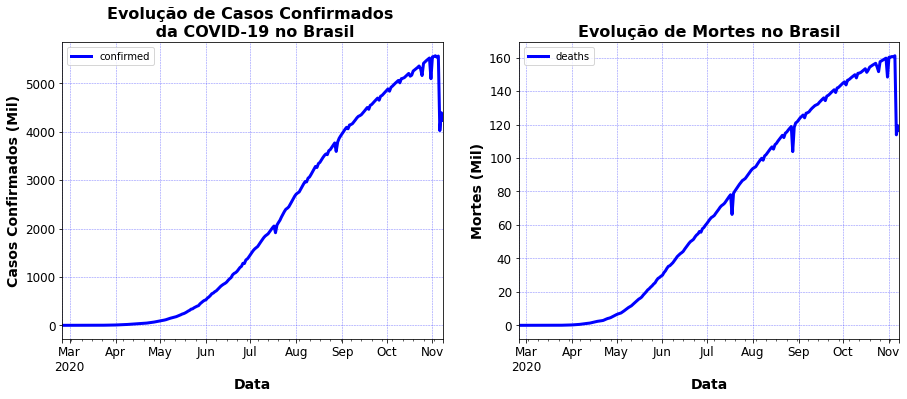

In [ ]:
# Criando uma figura lado a lado de Número de Casos Confirmados e Número de Mortes no Brasil 
# plt.subplot(nrows, ncols, plot_number)
############################### criar figura ###################################
plt.figure(figsize=(15,12))

############################# plotar gráfico 1 #################################

ax1 = plt.subplot(221)

covid_brasil_mil.plot(x="date",y="confirmed",linestyle='-', color="blue", lw="3", ax = ax1)

########################## Estética do gráfico 1 ###############################


plt.legend(loc = "upper left", borderaxespad=0.5) #posiciona a legenda
plt.title("Evolução de Casos Confirmados \n da COVID-19 no Brasil", fontsize = 16, fontweight = "bold") # adiciona título
plt.xlabel("Data",fontsize = 14, fontweight = "bold") #nomeia x
plt.ylabel("Casos Confirmados (Mil)",fontsize = 14, fontweight = "bold") #nomeia y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

############################# plotar gráfico 2 #################################

ax2 = plt.subplot(222)
covid_brasil_mil.plot(x="date",y="deaths",linestyle='-', color="blue", lw="3", ax = ax2)

########################## Estética do gráfico 2 ###############################

plt.legend(loc = "upper left", borderaxespad=0.5) #posiciona a legenda
plt.title("Evolução de Mortes no Brasil", fontsize = 16, fontweight = "bold") # adiciona título
plt.xlabel("Data",fontsize = 14, fontweight = "bold") #nomeia x
plt.ylabel("Mortes (Mil)",fontsize = 14, fontweight = "bold") #nomeia y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.show()

***
**OBSERVAÇÕES E ANÁLISES**

**Quão impactantes são estes gráficos para você?**

**Acredita mesmo que você não corre risco de entrar para esta estatísta?**

***

O que este gráfico revela é que o número de caso confirmados e de mortes devido ao corona vírus ainda são extremamente altos no Brasil, e o mais surpreendente é que os números levantados podem ser longe da real dimensão do problema, além disto o número de internações [4] voltou a subir em Novembro de 2020.

A **falsa sensação de término de pandemia** tem levado muitos brasileiros a afrouxar as medidas de segurança quanto ao isolamento.

Associado a este problema temos um cenário de alto número de subnotificações e este é um grande problema enfrentado pelo Brasil, como mostra uma reportagem de junho [5] e de outubro [6] onde muitos pacientes tem sido diagnosticados com a **síndrome respiratória aguda grave** (SRAG) que em 2020 teve um crescimento com relação à média dos meses anteriores, 2018 e 2019.

A seguir vamos ver o número de registros de notificações ocorridas por regiões e posteriormente por estados analisando os número de casos confirmados e mortes por região / estado

Referências:

[4] Mônica Bergamo. Hospitais privados de SP voltam a ter salto de internação por Covid-19. Folha de São Paulo, 9 nov.2020. Disponível em: https://www1.folha.uol.com.br/colunas/monicabergamo/2020/11/hospitais-privados-de-sp-voltam-a-ter-salto-de-internacao-por-covid-19.shtml Acesso em: 13 nov. 2020

[5] Wandy Ribeiro. COVID-19: BRASIL PODE ESTAR NO PLATÔ POR FALTA DE TESTES, ICTQ. Disponível em: https://www.ictq.com.br/farmacia-clinica/1685-covid-19-brasil-pode-estar-no-plato-por-falta-de-testes Acesso em: 13 nov. 2020

[6] Mateus Parreiras. Descompasso de dados sugere ampla subnotificação da COVID-19 em Minas. Estado de Minas Gerais, 20 ago. 2020. Disponível em: https://www.em.com.br/app/noticia/gerais/2020/08/20/interna_gerais,1177700/descompasso-de-dados-sugere-ampla-subnotificacao-da-covid-19-em-minas.shtml Acesso em: 13 nov. 2020

### Explorando os dados por região

In [ ]:
dados_covid_selecao_mil.head(2)

,date,confirmed,deaths,state,region,estimated_population,confirmed_per_100K_inhabitants,deaths_per_100K_inhabitants
0,2020-11-08,53.01,0.75,AP,Norte,861.77,6151.27,87.15
1,2020-11-03,52.83,0.75,AP,Norte,861.77,6130.62,87.15


In [ ]:
covid_regiao = dados_covid_selecao_mil[["region","date","confirmed", "deaths"]].groupby("region").sum().sort_values("confirmed")
covid_regiao = covid_regiao.reset_index()
covid_regiao

,region,confirmed,deaths
0,Sul,57573.43,1193.88
1,Centro-Oeste,59357.47,1263.02
2,Norte,76143.84,2100.98
3,Nordeste,157420.45,5048.99
4,Sudeste,184775.71,7880.61


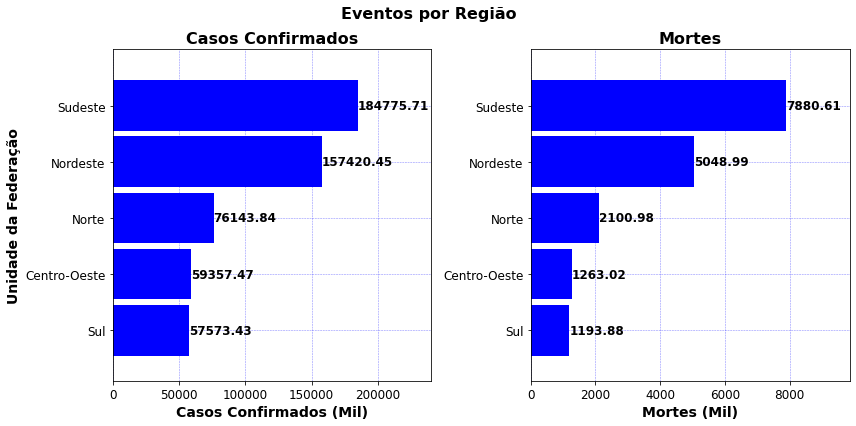

In [ ]:
# Criando uma figura lado a lado de Número de Casos Confirmados e Número de Mortes por Região
plotagem_barh_lado_a_lado(12,6,"Eventos por Região",
                          covid_regiao["region"], covid_regiao["confirmed"],
                          "Casos Confirmados", "Casos Confirmados (Mil)", "Unidade da Federação", 0, 1.3,
                          covid_regiao["region"], covid_regiao["deaths"],
                          "Mortes", "Mortes (Mil)", 0, 1.25, 0.88
                          )
plt.show()

In [ ]:
#Fazendo groupby para as diferentes regiões do Brasil
covid_regiao_mil = dados_covid_selecao_mil[["region","date","confirmed", "deaths"]].groupby(by=["region","date"], as_index=False).sum()
covid_regiao_mil.tail()

,region,date,confirmed,deaths
1230,Sul,2020-11-04,736.17,14.34
1231,Sul,2020-11-05,740.65,14.42
1232,Sul,2020-11-06,476.60,11.30
1233,Sul,2020-11-07,754.25,14.55
1234,Sul,2020-11-08,756.73,14.60


In [ ]:
covid_regiao_milhoes = dados_covid_selecao_milhoes[["region","date","confirmed", "deaths"]].groupby(by=["region","date"], as_index=False).sum()
covid_regiao_milhoes.tail()

,region,date,confirmed,deaths
1230,Sul,2020-11-04,0.74,0.01
1231,Sul,2020-11-05,0.74,0.01
1232,Sul,2020-11-06,0.48,0.01
1233,Sul,2020-11-07,0.75,0.01
1234,Sul,2020-11-08,0.76,0.01


In [ ]:
def plotagem_evolucao_covid_lado_a_lado(subtitulo, dados, 
                                        eixox1, eixoy1, tonalidade1, titulo1,nome_eixox1, nome_eixoy1,
                                        eixox2, eixoy2, tonalidade2, titulo2, nome_eixox2, nome_eixoy2, ajuste_top_subtitulo):

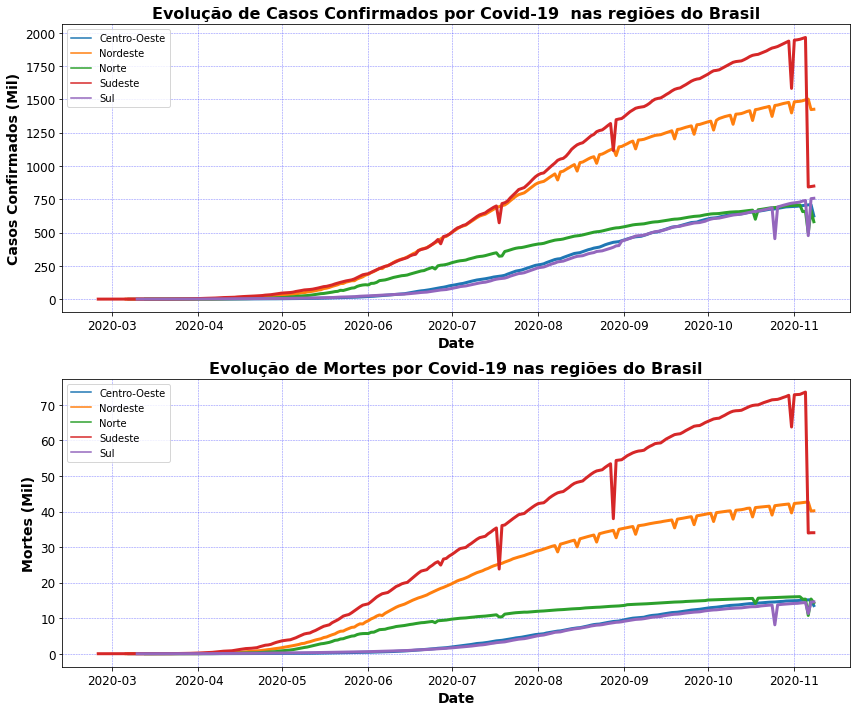

In [ ]:
#plotagem evolução covid Sudeste
plotagem_evolucao_covid(covid_regiao_mil, "date", "confirmed", "region",
         "Evolução de Casos Confirmados por Covid-19  nas regiões do Brasil",
         "Date", "Casos Confirmados (Mil)",
         "date", "deaths", "region",
         "Evolução de Mortes por Covid-19 nas regiões do Brasil",
         "Date", "Mortes (Mil)"
         )
plt.show()

In [ ]:
covid_regiao_mil.query("region == 'Sudeste'").shape

(258, 4)

In [ ]:
covid_regiao_mil.query("region == 'Sudeste'").query("date == '2020-07-17'")

,region,date,confirmed,deaths
876,Sudeste,2020-07-17,699.38,35.37


In [ ]:
covid_regiao_mil.query("region == 'Sudeste'").query("date == '2020-07-18'")

,region,date,confirmed,deaths
877,Sudeste,2020-07-18,573.03,23.81


In [ ]:
covid_regiao_mil.query("region == 'Sudeste'")[142:147]

,region,date,confirmed,deaths
875,Sudeste,2020-07-16,689.21,34.86
876,Sudeste,2020-07-17,699.38,35.37
877,Sudeste,2020-07-18,573.03,23.81
878,Sudeste,2020-07-19,717.15,36.05
879,Sudeste,2020-07-20,723.27,36.21


In [ ]:
covid_regiao_mil.query("region == 'Sudeste'")[-4:]

,region,date,confirmed,deaths
987,Sudeste,2020-11-05,1964.13,73.59
988,Sudeste,2020-11-06,842.00,33.96
989,Sudeste,2020-11-07,845.16,34.03
990,Sudeste,2020-11-08,848.55,34.04


***
**OBSERVAÇÕES E ANÁLISES** sobre as regiões

***

Observe que há vales nas curvas plotadas que se destacam em algumas regiões, o Nordeste, por exemplo, tem uma queda no número de mortes e confirmações aparentemente periódico, além do Nordeste, o Sudeste também tem dias que tem forte queda do número de caso e mortes. 

Os vales da curva de Mortes do Sudeste ocorreram dia 2020-07-18, 2020-08-28 e 2020-10-31, e do dia 2020-11-06 até o último dia visto neste gráfico.
Os vales da curva de Mortes do Nordeste ocorreram em Agosto dias 8, 15, 22 e 29; Em Setembro nos dias 5, 19 e 26 e em Outubro nos dias 10, 17, 24 e 31; e em Novembro do dia 06 até o último dia visto neste gráfico.

O vale da curva em Novembro já é conhecido e foi uma falha no sistema de lançamento devido a um ataque raquer sofrido pelo sistema [7].

Já os vales da curva do período de Julho, Agosto, Setembro e Outubro uma hipótese é que alguns estados tiveram subnotificações mais evidentes nestes dias, e esta possibilidade de **não lançamento dos dados** pode ser mais evidente neste dias.

Na sequência iremos verificar quais estados apresentam estas possíveis subnotificações e checar se realmente os vales apresentados neste gráficos são devido a isto.

[7] Machado da Costa. Brasil sofre seu maior ataque hacker da história. Veja, 05 nov.2020. Disponível em: https://veja.abril.com.br/blog/radar-economico/brasil-sofre-seu-maior-ataque-hacker-da-historia/ Acesso em: 19 nov. 2020

***

In [ ]:
covid_regiao_mil.head()

,region,date,confirmed,deaths
0,Centro-Oeste,2020-03-07,0.00,0.00
1,Centro-Oeste,2020-03-08,0.00,0.00
2,Centro-Oeste,2020-03-09,0.00,0.00
3,Centro-Oeste,2020-03-10,0.00,0.00
4,Centro-Oeste,2020-03-11,0.00,0.00


### Explorando os dados dos estados

In [ ]:
dados_covid_selecao.head(2)

,date,confirmed,deaths,state,region,estimated_population
0,2020-11-08,53010,751,AP,Norte,861773.00
1,2020-11-03,52832,751,AP,Norte,861773.00


In [ ]:
registros_estados = dados_covid_selecao.state.value_counts(ascending=True)
registros_estados.head(2)

RN    214
RO    225
Name: state, dtype: int64

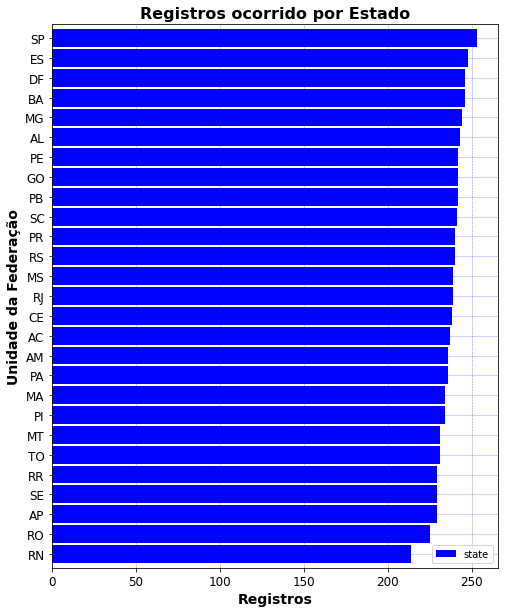

In [ ]:
# plotando o gráfico de Unidade da Federação x Registros

############################# plotar o gráfico #################################
ax = registros_estados.sort_values().plot(kind="barh",figsize=(8,10), width=0.9, color = "blue", tick_label = "12")
    
########################### Estética do gráfico ################################

plt.legend(loc = "lower right", borderaxespad=0.5) #posiciona a legenda
plt.title("Registros ocorrido por Estado", fontsize = 16, fontweight = "bold") # adiciona título
plt.xlabel("Registros",fontsize = 14, fontweight = "bold") #nomeia x
plt.ylabel("Unidade da Federação",fontsize = 14, fontweight = "bold") #nomeia y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()

In [ ]:
dados_covid_selecao_mil.head(2)

,date,confirmed,deaths,state,region,estimated_population,confirmed_per_100K_inhabitants,deaths_per_100K_inhabitants
0,2020-11-08,53.01,0.75,AP,Norte,861.77,6151.27,87.15
1,2020-11-03,52.83,0.75,AP,Norte,861.77,6130.62,87.15


In [ ]:
#Dados de número de eventos (confirmações e mortes) por estados agrupados, ordenados pelo valor de casos confirmados, dados em milhões
covid_estados_soma_milhoes = dados_covid_selecao_milhoes[["state","date","confirmed", "deaths"]].groupby("state").sum().sort_values("confirmed")
#inserindo um index numerado e colocando estados na coluna novamente
covid_estados_soma_milhoes = covid_estados_soma_milhoes.reset_index()
covid_estados_soma_milhoes.head(2)

,state,confirmed,deaths
0,AC,3.57,0.09
1,RR,5.79,0.08


In [ ]:
#Dados de número de eventos (confirmações e mortes) por estados agrupados, ordenados pelo valor de casos confirmados, dados em milhares
#Fazendo groupby para os diferentes estados do Brasil somando o total por estados
covid_estados = dados_covid_selecao_mil[["state","date","confirmed", "deaths"]].groupby("state").sum().sort_values("confirmed")
covid_estados = covid_estados.reset_index()
covid_estados.head(2)

,state,confirmed,deaths
0,AC,3567.86,87.86
1,RR,5793.60,83.00


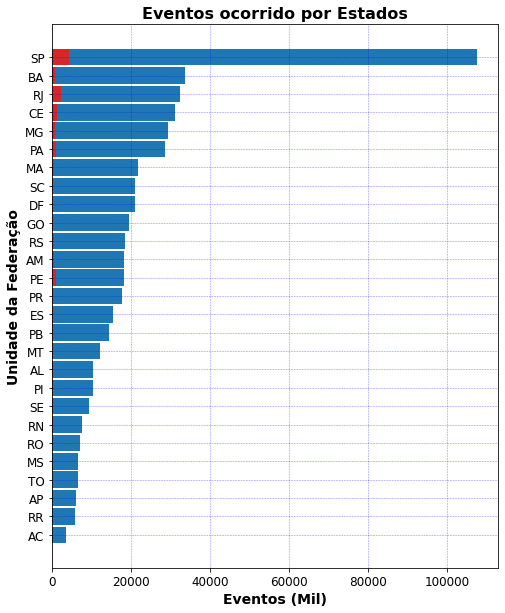

In [ ]:
# Plotando o Número de Eventos por estados
plt.figure(figsize=(8,10))
############################# plotar o gráfico #################################
plt.barh(covid_estados["state"], covid_estados["confirmed"], height = 0.9, color = "tab:blue")
plt.barh(covid_estados["state"], covid_estados["deaths"], height = 0.9, color = "tab:red")
########################### Estética do gráfico ################################

plt.title("Eventos ocorrido por Estados", fontsize = 16, fontweight = "bold") # adiciona título
plt.xlabel("Eventos (Mil)",fontsize = 14, fontweight = "bold") #nomeia x
plt.ylabel("Unidade da Federação",fontsize = 14, fontweight = "bold") #nomeia y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()

In [ ]:
#Fazendo groupby para os diferentes estados do Brasil somando de acordo com a data em milhoes
covid_estados_milhoes = dados_covid_selecao_milhoes[["state","date","confirmed", "deaths"]].groupby(by=["state","date"], as_index=False).sum()
covid_estados_milhoes.head()

,state,date,confirmed,deaths
0,AC,2020-03-17,0.00,0.00
1,AC,2020-03-18,0.00,0.00
2,AC,2020-03-19,0.00,0.00
3,AC,2020-03-20,0.00,0.00
4,AC,2020-03-21,0.00,0.00


In [ ]:
#Fazendo groupby para os diferentes estados do Brasil somando de acordo com a data em milhares
covid_estados_mil = dados_covid_selecao_mil[["state","date","confirmed", "deaths"]].groupby(by=["state","date"], as_index=False).sum()
covid_estados_mil.head()

,state,date,confirmed,deaths
0,AC,2020-03-17,0.00,0.00
1,AC,2020-03-18,0.00,0.00
2,AC,2020-03-19,0.00,0.00
3,AC,2020-03-20,0.01,0.00
4,AC,2020-03-21,0.01,0.00


In [ ]:
dados_covid_selecao_milhoes.head(2)

,date,confirmed,deaths,state,region,estimated_population,confirmed_per_100K_inhabitants,deaths_per_100K_inhabitants
0,2020-11-08,0.05,0.00,AP,Norte,0.86,6151.27,87.15
1,2020-11-03,0.05,0.00,AP,Norte,0.86,6130.62,87.15


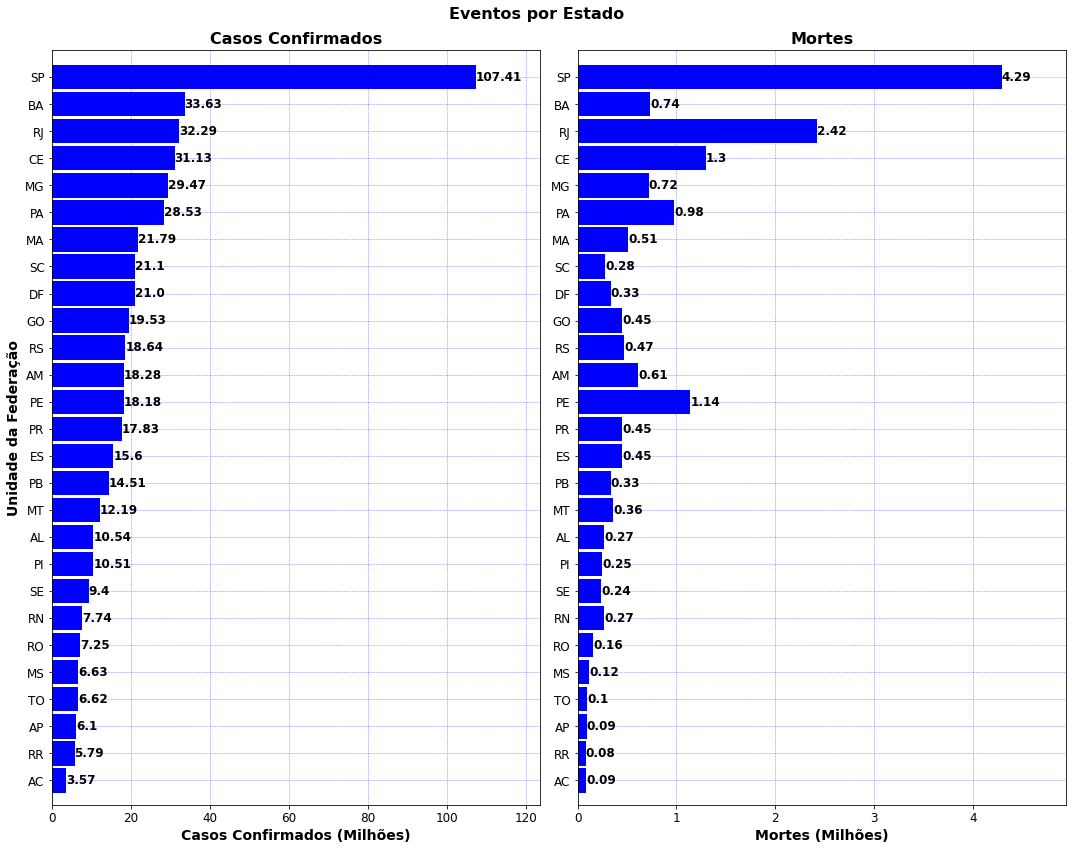

In [ ]:
# Criando uma figura lado a lado de Número de Casos Confirmados e Número de Mortes por Região
plotagem_barh_lado_a_lado(15,12,"Eventos por Estado",
                          covid_estados_soma_milhoes["state"], covid_estados_soma_milhoes["confirmed"],
                          "Casos Confirmados", "Casos Confirmados (Milhões)", "Unidade da Federação", 0, 1.15,
                          covid_estados_soma_milhoes["state"], covid_estados_soma_milhoes["deaths"],
                          "Mortes", "Mortes (Milhões)", 0, 1.15, 0.93
                          )
plt.show()

***
**OBSERVAÇÕES E ANÁLISES**

***

Não há linearidade nos estados entre os casos confirmados e o número de mortos

Há estados que tiveram grande diferença entre o número de casos confirmados e mortes, observe os estados BA, RJ, PE e SC, eles apresentam cenários bem distintos, alguns possíveis motivos para esta diferença são:

- número de testagens

No Brasil foi recorrente a falta de testagem, desta forma, algumas pessoas pegavam Covid-19 não entravam para a estatística, alguns por serem assintomáticos e outros por não apresentando casos graves não iam aos hospitais, além disso a falta de teste fez com que hospitais escolhessem pacientes a serem testados.

Em julho foi reportado [8] que embora o Brasil fosse um dois países que tivessem mais pessoas infectadas e mortes, apenas uma baixa quantidade de teste eram realizadas, desta forma a **dificuldade em rastrear a propagação do vírus devido a falta de testagem foi um dos pontos críticos no controle da disseminação**.

- condições de hospitais e leitos de UTI, possíveis lotação

No dia 08.11.2020 o Hospital Geral de Roraima apresentou 90% dos leitos de UTI para Covid-19 ocupados [9]

A seguir vamos fazer o cálculo de letalidade e tentar observar melhor estes dados. 

Cálculo feito:

taxa de letalidade dos casos(%) = (mortes * 100 / casos)

mortes = Número de mortes por uma doença em um determinado período e área
casos = Número de casos diagnosticados pela mesma doença no mesmo período e área
[10]

Referências:

[8] Ferraz Jr. Brasil tem os mais baixos índices de testagem da covid-19 no mundo. Jornal da USP, 14 jul. 2020. Disponível em: https://jornal.usp.br/atualidades/brasil-tem-os-mais-baixos-indices-de-testagem-da-covid-19-no-mundo/ Acesso em: 12 nov. de 2020

[9] Com 90% dos leitos de UTI para Covid-19 ocupados no Hospital Geral, RR chega a 59.189 casos. G1 RR, 8 nov. 2020. Disponível em: https://g1.globo.com/rr/roraima/noticia/2020/11/08/com-90percent-dos-leitos-de-uti-para-covid-19-ocupados-no-hospital-de-geral-rr-chega-a-59189-casos.ghtml Acesso em: 13 nov. 2020

[10] Wikipédia. Disponível em: https://pt.wikipedia.org/wiki/Taxa_de_letalidade Acesso em: 21 nov. 2020

In [ ]:
#Dados de número de eventos (confirmações e mortes) por estados agrupados, ordenados pelo valor de casos confirmados, dados em mil
covid_estados_soma_mil = dados_covid_selecao_mil[["state","date","confirmed", "deaths"]].groupby("state").sum().sort_values("confirmed")
#inserindo um index numerado e colocando estados na coluna novamente
covid_estados_soma_mil.head()

,confirmed,deaths
state,,
AC,3567.86,87.86
RR,5793.60,83.00
AP,6104.10,94.46
TO,6615.30,95.46
MS,6634.82,119.05


In [ ]:
# Cálculo de letalidade é
taxa_de_letalidade_total = covid_estados_soma_milhoes["deaths"]*100/covid_estados_soma_milhoes["confirmed"]
taxa_de_letalidade_total = taxa_de_letalidade_total.tolist()
#taxa_de_letalidade_total

In [ ]:
covid_estados_soma_mil["taxa_de_letalidade_total"]=taxa_de_letalidade_total
covid_estados_soma_mil = covid_estados_soma_mil.reset_index()
covid_estados_soma_mil = covid_estados_soma_mil.sort_values("taxa_de_letalidade_total")
covid_estados_soma_mil.head()

,state,confirmed,deaths,taxa_de_letalidade_total
19,SC,21102.81,275.41,1.31
1,RR,5793.60,83.00,1.43
3,TO,6615.30,95.46,1.44
2,AP,6104.10,94.46,1.55
18,DF,21004.22,334.37,1.59


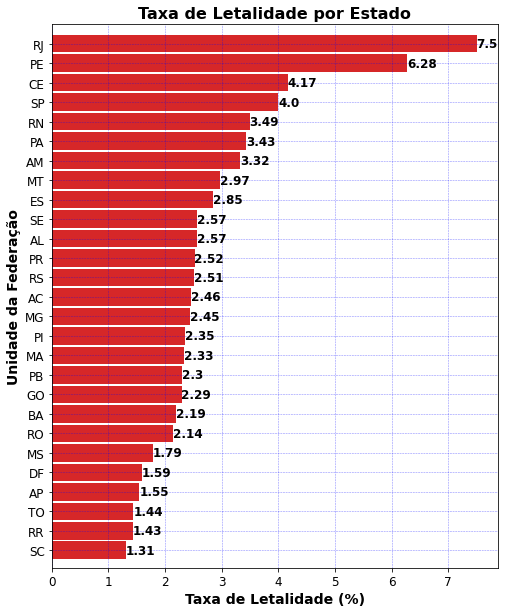

In [ ]:
#Figura de Letalidade Total por Estado
############################### criar figura ###################################
plt.figure(figsize=(8,10))
############################# plotar gráfico 1 #################################

plt.barh(covid_estados_soma_mil["state"], covid_estados_soma_mil["taxa_de_letalidade_total"], height = 0.9, color = "tab:red")

########################## Estética do gráfico 1 ###############################

#plt.legend(loc = "lower right", borderaxespad=0.5) #posiciona a legenda
plt.title("Taxa de Letalidade por Estado", fontsize = 16, fontweight = "bold") # adiciona título
plt.xlabel("Taxa de Letalidade (%)",fontsize = 14, fontweight = "bold") #nomeia x
plt.ylabel("Unidade da Federação",fontsize = 14, fontweight = "bold") #nomeia y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y


plt.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.xlim(0,covid_estados_soma_mil["taxa_de_letalidade_total"].max()*1.05)#aumentei o limite do eixo x para caber a legenda de cada barra sem ficar sobre o eixo
plt.ylim(-0.9,len(covid_estados_soma_mil["state"]))#ajustei o limite do eixo y para não sobrar espaço demais

#rotina para adicionar o número em frente cada barra
for index, value in enumerate(covid_estados_soma_mil["taxa_de_letalidade_total"].round(2)):
    plt.text(value, index, str(value), color='black', fontweight="bold", fontsize=12, verticalalignment='center')
plt.show()

***
**OBSERVAÇÕES E ANÁLISES** Taxa de Letalidade

***

Observe que o Rio de Janeiro tem a maior taxa de letalidade, seguido por Pernambuco. Esta análise é confirmada por estudos e notícias sobre o Rio de Janeiro como esta de Setembro noticiada pela FioCruz [11], reportando que o estado do Rio apresentou uma taxa de letalidade de 7,8% enquanto o município do Rio apresentou um taxa de 10,7% e representa uma das mais altas taxas de letalidade do mundo. Possíveis fatores para estes altos valores podem ser devido ao número de casos de subnotificação ser muito alto e associado a isto há a possibilidade dos hospitais não estarem sendo suficientes para os casos graves. Durante o começo de uma pandemia a taxa de letalidade tende a ser alto, porém, com o passar do tempo é comum está taxa reduzir já que começam a ser feito mais testagem e há um aumento do número de casos confirmados e ao fim da pandemia, com vacinas e testagens, diminuir o número de morte, há a tendência desta taxa cair.

[11] PH de Noronha. Letalidade por Covid-19 no Rio está acima da média mundial,Portal FioCruz, 01 set. 2020. Disponível em: https://portal.fiocruz.br/noticia/letalidade-por-covid-19-no-rio-esta-acima-da-media-mundial#:~:text=Para%20efeito%20de%20compara%C3%A7%C3%A3o%2C%20a,as%20m%C3%A9dias%20brasileira%20e%20mundial. Acesso em: 20 nov. 2020

***

In [ ]:
covid_regiao_estado_mil = dados_covid_selecao_mil[["region", "state","date","confirmed", "deaths"]].groupby(by=["region","state","date"], as_index=False).sum()
covid_regiao_estado_mil.head()

,region,state,date,confirmed,deaths
0,Centro-Oeste,DF,2020-03-07,0.00,0.00
1,Centro-Oeste,DF,2020-03-08,0.00,0.00
2,Centro-Oeste,DF,2020-03-09,0.00,0.00
3,Centro-Oeste,DF,2020-03-10,0.00,0.00
4,Centro-Oeste,DF,2020-03-11,0.00,0.00


***
Entendendo os vales do Sudeste
***

In [ ]:
dados_covid_selecao_milhoes.query("region == 'Sudeste'").head()

,date,confirmed,deaths,state,region,estimated_population,confirmed_per_100K_inhabitants,deaths_per_100K_inhabitants
77141,2020-11-08,0.16,0.00,ES,Sudeste,4.06,3996.70,96.60
77142,2020-11-07,0.16,0.00,ES,Sudeste,4.06,3966.68,96.43
77143,2020-11-06,0.16,0.00,ES,Sudeste,4.06,3958.86,96.21
77144,2020-11-05,0.16,0.00,ES,Sudeste,4.06,3932.36,95.86
77145,2020-11-04,0.16,0.00,ES,Sudeste,4.06,3906.64,95.57


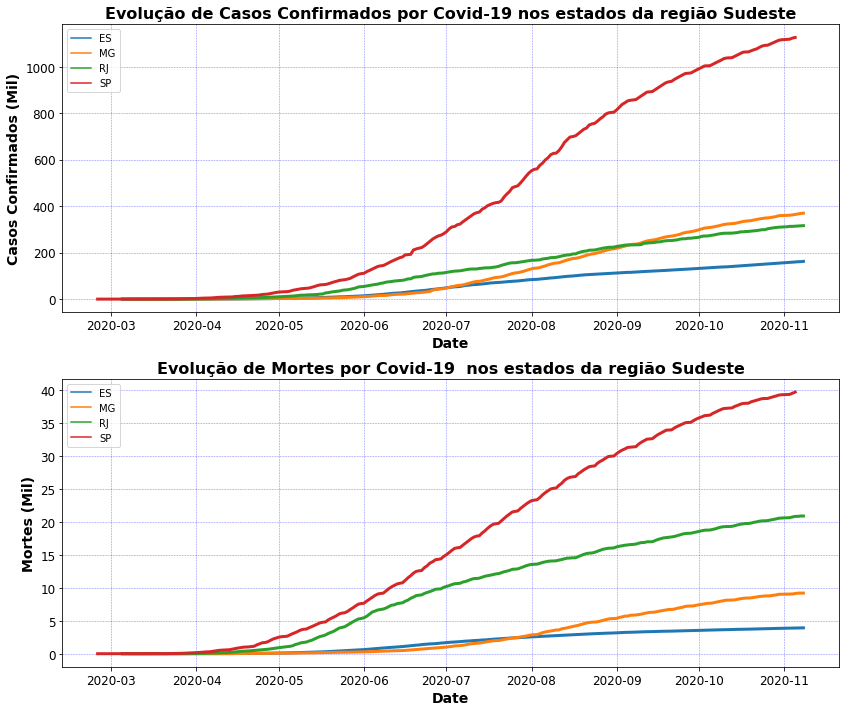

In [ ]:
#plotagem evolução covid Sudeste
plotagem_evolucao_covid(covid_regiao_estado_mil.query("region == 'Sudeste'"), "date", "confirmed", "state",
         "Evolução de Casos Confirmados por Covid-19 nos estados da região Sudeste",
         "Date", "Casos Confirmados (Mil)",
         "date", "deaths", "state",
         "Evolução de Mortes por Covid-19  nos estados da região Sudeste",
         "Date", "Mortes (Mil)"
         )
plt.show()

In [ ]:
#todos estados fizeram lançamento
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Sudeste"].loc[covid_regiao_estado_mil["date"] == "2020-07-17"]

,region,state,date,confirmed,deaths
4836,Sudeste,ES,2020-07-17,69.46,2.17
5081,Sudeste,MG,2020-07-17,87.27,1.90
5321,Sudeste,RJ,2020-07-17,135.23,11.92
5575,Sudeste,SP,2020-07-17,407.42,19.38


In [ ]:
#faltou o lançamento do estado RJ
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Sudeste"].loc[covid_regiao_estado_mil["date"] == "2020-07-18"]

,region,state,date,confirmed,deaths
4837,Sudeste,ES,2020-07-18,70.13,2.20
5082,Sudeste,MG,2020-07-18,90.88,1.96
5576,Sudeste,SP,2020-07-18,412.03,19.65


In [ ]:
#todos estados fizeram lançamento
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Sudeste"].loc[covid_regiao_estado_mil["date"] == "2020-07-19"]

,region,state,date,confirmed,deaths
4838,Sudeste,ES,2020-07-19,70.61,2.22
5083,Sudeste,MG,2020-07-19,92.97,1.98
5322,Sudeste,RJ,2020-07-19,138.52,12.11
5577,Sudeste,SP,2020-07-19,415.05,19.73


In [ ]:
#faltou o lançamento do estado RJ
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Sudeste"].loc[covid_regiao_estado_mil["date"] == "2020-08-28"]

In [ ]:
#faltou o lançamento do estado MG
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Sudeste"].loc[covid_regiao_estado_mil["date"] == "2020-10-31"]

*** 
**OBSERVAÇÕES E ANÁLISES** Entendendo os vales do Sudeste

***
Foi comprovado e observado que embora o gráfico dos estados do Sudeste não mostrem os vales, percebi que é a falta de lançamento de um estado inteiro neste dia e não apenas o lançamento de um valor menor.
Os vales da curva de Mortes do Sudeste do dia:

- 2020-07-18 e 2020-08-28 o estado que não fez este lançamento foi o RJ.

- 2020-10-31 o estado que não fez o lançamento dos dados de mortes foi o estados de MG.

- 2020-11-06 como já mencionado foi devido a falha do sistema.

***

Entendendo os vales do Nordeste

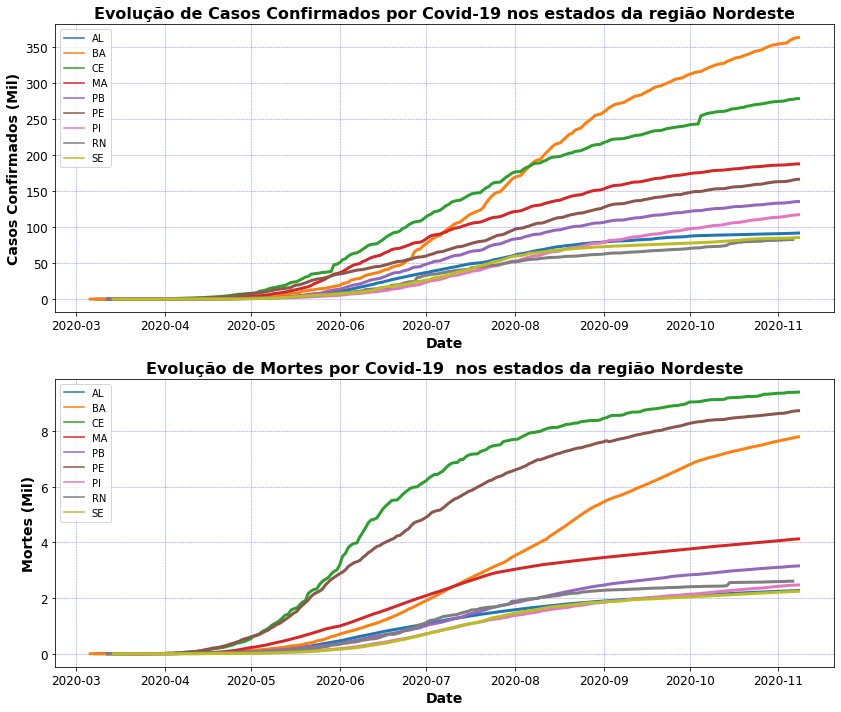

In [ ]:
#plotagem evolução covid Nordeste
plotagem_evolucao_covid(covid_regiao_estado_mil.query("region == 'Nordeste'"), "date", "confirmed", "state",
         "Evolução de Casos Confirmados por Covid-19 nos estados da região Nordeste",
         "Date", "Casos Confirmados (Mil)",
         "date", "deaths", "state",
         "Evolução de Mortes por Covid-19  nos estados da região Nordeste",
         "Date", "Mortes (Mil)"
         )
plt.show()

In [ ]:
#todos estados fizeram lançamento
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Nordeste"].loc[covid_regiao_estado_mil["date"] == "2020-08-07"]

,region,state,date,confirmed,deaths
1107,Nordeste,AL,2020-08-07,65.92,1.65
1353,Nordeste,BA,2020-08-07,187.89,3.84
1591,Nordeste,CE,2020-08-07,186.56,7.95
1825,Nordeste,MA,2020-08-07,128.85,3.14
2067,Nordeste,PB,2020-08-07,89.12,1.97
2309,Nordeste,PE,2020-08-07,102.87,6.87
2543,Nordeste,PI,2020-08-07,59.57,1.47
2771,Nordeste,RN,2020-08-07,55.31,1.98
2986,Nordeste,SE,2020-08-07,63.73,1.56


In [ ]:
#faltou o lançamento do estado RN
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Nordeste"].loc[covid_regiao_estado_mil["date"] == "2020-08-08"]

,region,state,date,confirmed,deaths
1108,Nordeste,AL,2020-08-08,66.75,1.67
1354,Nordeste,BA,2020-08-08,191.40,3.90
1592,Nordeste,CE,2020-08-08,188.29,7.95
1826,Nordeste,MA,2020-08-08,129.70,3.15
2068,Nordeste,PB,2020-08-08,89.89,1.98
2310,Nordeste,PE,2020-08-08,104.11,6.92
2544,Nordeste,PI,2020-08-08,59.98,1.48
2987,Nordeste,SE,2020-08-08,64.27,1.58


In [ ]:
#todos estados fizeram lançamento
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Nordeste"].loc[covid_regiao_estado_mil["date"] == "2020-08-09"]

,region,state,date,confirmed,deaths
1109,Nordeste,AL,2020-08-09,67.61,1.68
1355,Nordeste,BA,2020-08-09,193.03,3.95
1593,Nordeste,CE,2020-08-09,188.64,7.98
1827,Nordeste,MA,2020-08-09,130.14,3.17
2069,Nordeste,PB,2020-08-09,90.08,2.00
2311,Nordeste,PE,2020-08-09,105.38,6.97
2545,Nordeste,PI,2020-08-09,60.18,1.50
2772,Nordeste,RN,2020-08-09,55.62,1.98
2988,Nordeste,SE,2020-08-09,64.69,1.59


In [ ]:
#faltou o lançamento do estado RN
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Nordeste"].loc[covid_regiao_estado_mil["date"] == "2020-08-15"]

In [ ]:
#faltou o lançamento do estado RN
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Nordeste"].loc[covid_regiao_estado_mil["date"] == "2020-08-22"]

In [ ]:
#faltou o lançamento do estado RN
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Nordeste"].loc[covid_regiao_estado_mil["date"] == "2020-08-29"]

In [ ]:
#faltou o lançamento do estado RN
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Nordeste"].loc[covid_regiao_estado_mil["date"] == "2020-09-05"]

In [ ]:
#faltou o lançamento do estado RN
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Nordeste"].loc[covid_regiao_estado_mil["date"] == "2020-09-19"]

In [ ]:
#faltou o lançamento do estado RN
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Nordeste"].loc[covid_regiao_estado_mil["date"] == "2020-09-26"]

In [ ]:
#faltou o lançamento do estado RN
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Nordeste"].loc[covid_regiao_estado_mil["date"] == "2020-10-10"]

In [ ]:
#faltou o lançamento do estado RN
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Nordeste"].loc[covid_regiao_estado_mil["date"] == "2020-10-17"]

In [ ]:
#faltou o lançamento do estado RN
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Nordeste"].loc[covid_regiao_estado_mil["date"] == "2020-10-24"]

In [ ]:
#faltou o lançamento do estado RN
covid_regiao_estado_mil.loc[covid_regiao_estado_mil["region"] == "Nordeste"].loc[covid_regiao_estado_mil["date"] == "2020-10-31"]

*** 
**OBSERVAÇÕES E ANÁLISES** Entendendo os vales do Nordeste

***
Observa-se que a hipótese, embora o gráfico dos estados do Sudeste não mostrem os vales, apresenta a falta de lançamento de um estado inteiro neste dia e não apenas o lançamento de um valor menor.
Os vales da curva de Mortes do Sudeste do dia:

- 8, 15, 22 e 29 de Agosto foram devido ao estado RN que não lançamento dos dados nestes dias.

- 5, 19 e 26 de Setembro o estado que não fez este lançamento foi o RN.

- 10, 17, 24 e 31 de Outubro o estado que não fez este lançamento foi o RN.

Todos estes dias são sábados e aparentemente o apenas poucos sábados em Setembro e Outubro foram lançados pelo estado RN.

- 2020-11-06 como já mencionado foi devido a falha do sistema.

***

*** 

**ALGUMAS CONCLUSÕES**

***

Comprova-se a hipótese de **subnotificações**, e estas aparentes é apenas a ponta de um iceberg se é assim que podemos comparar a dimensão deste problema.
As subnotificações são um grande problema enfrentado nesta pandemia desde a muitos meses como este estudos de Junho e Outubro revelam [12][13]. Este problema dificulta ainda mais o enfrentamento com medidas mais acertivas para cada região. 

[12] Prado, et al. Análise da subnotificação de COVID-19 no Brasil, Rev Bras Ter Intensiva. 32(2):224-228, 2020. Disponível em: https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0103-507X2020000200224, Acesso em: 17 nov. 2020

[13] Vinícius Lemos e Luis Barrucho. Brasil chega a 150 mil mortes por covid-19, mas número real pode ser muito maior. BBC News Brasil, 10 out. 2020. Disponível em: https://www.bbc.com/portuguese/brasil-54478219, Acesso em: 17 nov. 2020

***

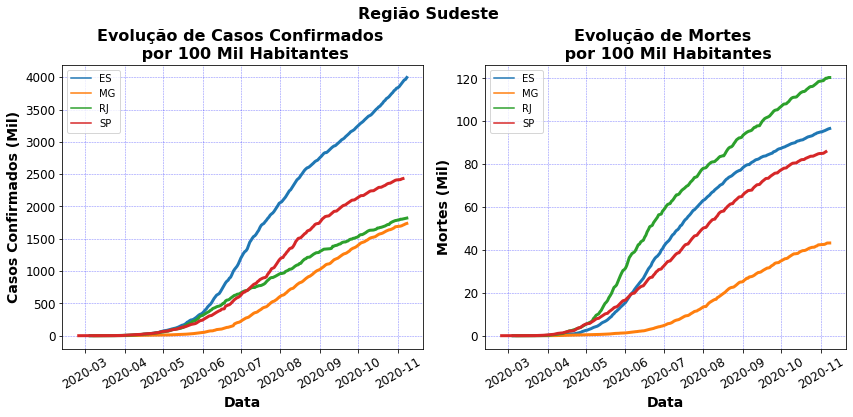

In [ ]:
#Plotando a região sudeste para comparar estes estados os casos confirmados e mortes por 100K Habitantes 
plotagem_evolucao_covid_lado_a_lado("Região Sudeste", dados_covid_selecao_milhoes.query("region == 'Sudeste'"), 
                                    "date", "confirmed_per_100K_inhabitants", "state",
                                    "Evolução de Casos Confirmados \n por 100 Mil Habitantes",
                                    "Data", "Casos Confirmados (Mil)",
                                    "date", "deaths_per_100K_inhabitants", "state",
                                    "Evolução de Mortes \n por 100 Mil Habitantes",
                                    "Data", "Mortes (Mil)", 0.90
                                    )
plt.show()

***
**OBSERVAÇÕES E ANÁLISES** sobre a região sudeste

***

É possível observar que a maior taxa de casos confirmados por 100 mil habitantes na região Sudeste são do estado de Espírito Santos, o estados que menos notificam são MG e RJ, porém o curioso é que embora o RJ não notifique é o estado com mais mortes por 100 mil habitantes. 

Uma hipótese é que o RJ não faz as testagem devidas e consequentemente há um grande número de subnotificações, há outros inúmeros fatores não excludentes que podem ser levados em consideração, como condições de leitos de hospitais, fatores socioeconômicos como as condições de residência que talvez impeçam de fazer a quarentena de forma devida, possibilidade de trabalho presencial e/ou remoto, fatores de idade média da população e também obesidade. [14][15]. 

Foi mostrado que a subnotificação nas comunidades e de mais vulnerabilidade social, como no caso do Rio de Janeiro apresentam um alto índice de subnotificações, a prefeitura tentou fazer uma estimativa no meio do ano e havia estimado que em torno de 25 % da população tinha pego o coronavírus mas não entram para as estatistica oficiais [16]. É apontado também que a letalidade no Rio de Janeiro é extremente alta em termos globais [11] como já observado na análise do gráfico de letalidade, onde o Rio apresentou uma letalidade de 7,5%, e ela pode ser fruto da subnotificação e a precarização do atendimento à saúde pública.

O estado de São Paulo fica em segundo lugar em termos de casos confirmados por 100 mil habitantes na região Sudeste, e em terceiro estado número de mortes por 100 mil habitantes na região Sudeste. 

[14] Léo Ramos Chaves. Obesidade pode agravar Covid-19, Revista Pesquisa Fapesp, out. 2020. Disponível em: https://revistapesquisa.fapesp.br/obesidade-pode-agravar-covid-19/ Acesso em: 20 nov. 2020

[15] Covid-19: obesidade é fator de risco tão importante quanto ser idoso para agravamento e morte pela doença. Fapesp na Mídia, 17 set. 2020. Disponível em: https://namidia.fapesp.br/covid-19-obesidade-e-fator-de-risco-tao-importante-quanto-ser-idoso-para-agravamento-e-morte-pela-doenca/247216 Acesso em: 20 nov. 2020

[16] Agência O Globo. Dados apontam subnotificação da covid-19 nas favelas do Rio. Exame, 5 jul. 2020. Disponível em: https://exame.com/brasil/dados-apontam-subnotificacao-da-covid-19-nas-favelas-do-rio/ Acesso em: 20 nov. 2020

[11] PH de Noronha. Letalidade por Covid-19 no Rio está acima da média mundial,Portal FioCruz, 01 set. 2020. Disponível em: https://portal.fiocruz.br/noticia/letalidade-por-covid-19-no-rio-esta-acima-da-media-mundial#:~:text=Para%20efeito%20de%20compara%C3%A7%C3%A3o%2C%20a,as%20m%C3%A9dias%20brasileira%20e%20mundial. Acesso em: 20 nov. 2020


***

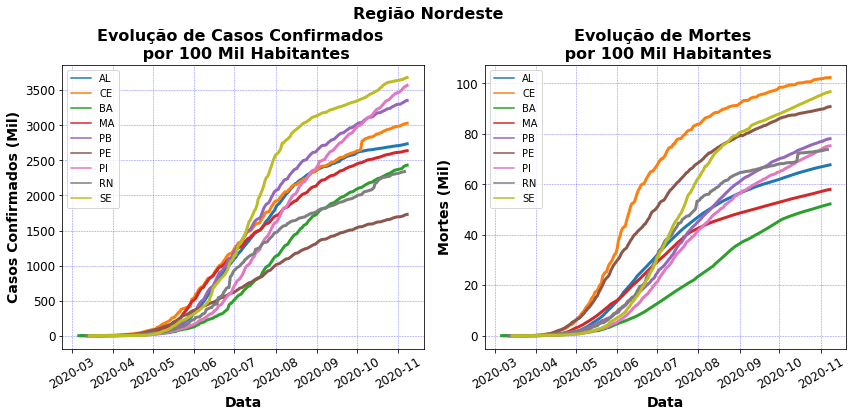

In [ ]:
#Plotando a região sudeste para comparar estes estados os casos confirmados e mortes por 100K Habitantes 
plotagem_evolucao_covid_lado_a_lado("Região Nordeste", dados_covid_selecao_milhoes.query("region == 'Nordeste'"), 
                                    "date", "confirmed_per_100K_inhabitants", "state",
                                    "Evolução de Casos Confirmados \n por 100 Mil Habitantes",
                                    "Data", "Casos Confirmados (Mil)",
                                    "date", "deaths_per_100K_inhabitants", "state",
                                    "Evolução de Mortes \n por 100 Mil Habitantes",
                                    "Data", "Mortes (Mil)", 0.90
                                    )
plt.show()

***
Observe que Pernambuco tem um comportamente semelhante ao comportamento apresentado pelo Rio de Janeiro, e assim como o Rio ele apresentam uma alta taxa de letalidade, Pernambuco registra 6,28%, e assim como o Rio de Janeiro pode ser devido a subnotificação e a precarização do atendimento à saúde pública.

***



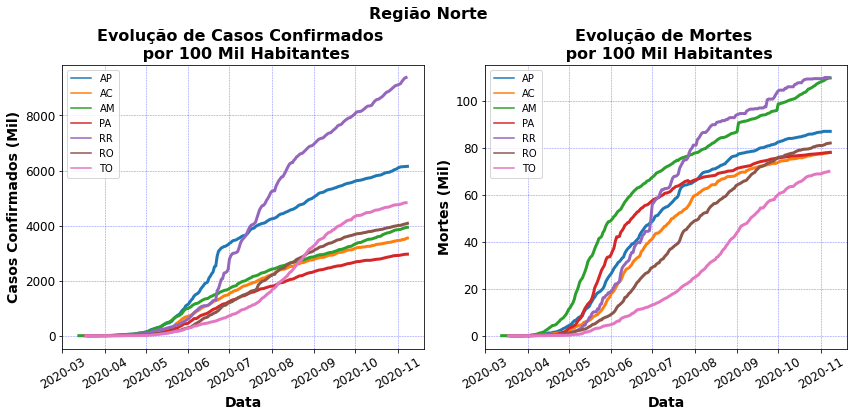

In [ ]:
#Plotando a região sudeste para comparar estes estados os casos confirmados e mortes por 100K Habitantes 
plotagem_evolucao_covid_lado_a_lado("Região Norte", dados_covid_selecao_milhoes.query("region == 'Norte'"), 
                                    "date", "confirmed_per_100K_inhabitants", "state",
                                    "Evolução de Casos Confirmados \n por 100 Mil Habitantes",
                                    "Data", "Casos Confirmados (Mil)",
                                    "date", "deaths_per_100K_inhabitants", "state",
                                    "Evolução de Mortes \n por 100 Mil Habitantes",
                                    "Data", "Mortes (Mil)", 0.90
                                    )
plt.show()

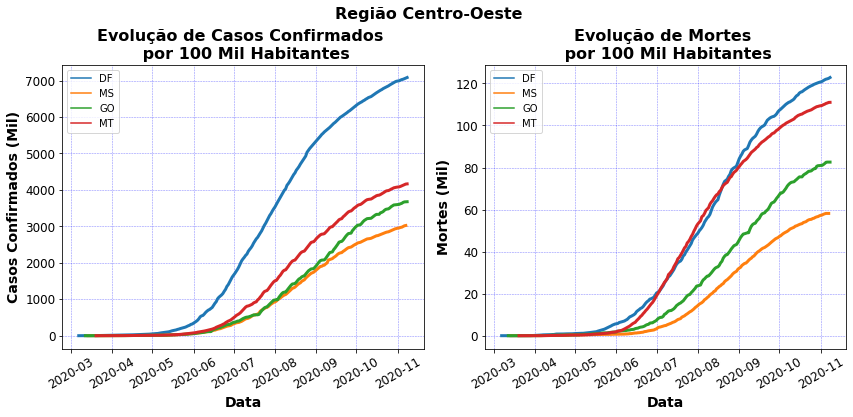

In [ ]:
#Plotando a região sudeste para comparar estes estados os casos confirmados e mortes por 100K Habitantes 
plotagem_evolucao_covid_lado_a_lado("Região Centro-Oeste", dados_covid_selecao_milhoes.query("region == 'Centro-Oeste'"), 
                                    "date", "confirmed_per_100K_inhabitants", "state",
                                    "Evolução de Casos Confirmados \n por 100 Mil Habitantes",
                                    "Data", "Casos Confirmados (Mil)",
                                    "date", "deaths_per_100K_inhabitants", "state",
                                    "Evolução de Mortes \n por 100 Mil Habitantes",
                                    "Data", "Mortes (Mil)", 0.90
                                    )
plt.show()

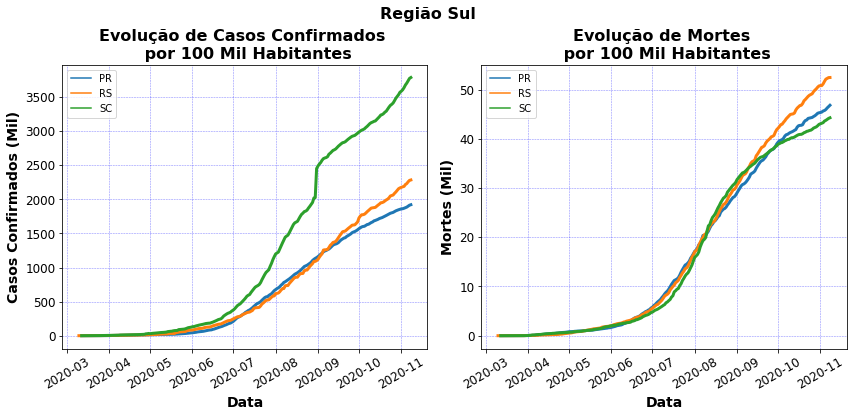

In [ ]:
#Plotando a região sudeste para comparar estes estados os casos confirmados e mortes por 100K Habitantes 
plotagem_evolucao_covid_lado_a_lado("Região Sul", dados_covid_selecao_milhoes.query("region == 'Sul'"), 
                                    "date", "confirmed_per_100K_inhabitants", "state",
                                    "Evolução de Casos Confirmados \n por 100 Mil Habitantes",
                                    "Data", "Casos Confirmados (Mil)",
                                    "date", "deaths_per_100K_inhabitants", "state",
                                    "Evolução de Mortes \n por 100 Mil Habitantes",
                                    "Data", "Mortes (Mil)", 0.90
                                    )
plt.show()

# **ÓBITOS CARTÓRIO** - Explorando SRAG

## Importanto os Dados
fonte dos dados: Brasil.IO

In [4]:
# Importando o arquivo em formato gzip
dados_obitos_cartorio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BootcampDataScience_Alura/obito_cartorio.csv.gz', 
                 compression='gzip')
#vamos mudar a forma de impressão - notação científica]
#para ele formatar ponto flutuante usar duas casas decimais 
#pd.options.display.float_format = "{:.2f}".format
dados_obitos_cartorio.tail(2)

,date,state,epidemiological_week_2019,epidemiological_week_2020,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,new_deaths_indeterminate_2019,new_deaths_respiratory_failure_2019,new_deaths_others_2019,new_deaths_pneumonia_2019,new_deaths_septicemia_2019,new_deaths_sars_2019,new_deaths_covid19,new_deaths_indeterminate_2020,new_deaths_respiratory_failure_2020,new_deaths_others_2020,new_deaths_pneumonia_2020,new_deaths_septicemia_2020,new_deaths_sars_2020,new_deaths_total_2019,new_deaths_total_2020
9880,2020-12-30,TO,1,53,48,451,3134,893,514,8,790,42,380,2715,672,481,24,5048,5104,NaN,3.0,10.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN
9881,2020-12-31,TO,1,53,48,452,3144,894,516,8,790,42,380,2715,672,481,24,5062,5104,NaN,1.0,10.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN


## Explorando e Visualizando os Dados

In [5]:
#verificando o tamanho do DataFrame: dados_obitos_cartorio (quantas linhas e colunas) 
print("O DataFrame possui {} registros e {} variáveis".format(dados_obitos_cartorio.shape[0], dados_obitos_cartorio.shape[1]))

O DataFrame possui 9882 registros e 34 variáveis


In [6]:
dados_obitos_cartorio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9882 entries, 0 to 9881
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 9882 non-null   object 
 1   state                                9882 non-null   object 
 2   epidemiological_week_2019            9882 non-null   int64  
 3   epidemiological_week_2020            9882 non-null   int64  
 4   deaths_indeterminate_2019            9882 non-null   int64  
 5   deaths_respiratory_failure_2019      9882 non-null   int64  
 6   deaths_others_2019                   9882 non-null   int64  
 7   deaths_pneumonia_2019                9882 non-null   int64  
 8   deaths_septicemia_2019               9882 non-null   int64  
 9   deaths_sars_2019                     9882 non-null   int64  
 10  deaths_covid19                       9882 non-null   int64  
 11  deaths_indeterminate_2020     

In [7]:
dados_obitos_cartorio.isnull().sum()

date                                      0
state                                     0
epidemiological_week_2019                 0
epidemiological_week_2020                 0
deaths_indeterminate_2019                 0
deaths_respiratory_failure_2019           0
deaths_others_2019                        0
deaths_pneumonia_2019                     0
deaths_septicemia_2019                    0
deaths_sars_2019                          0
deaths_covid19                            0
deaths_indeterminate_2020                 0
deaths_respiratory_failure_2020           0
deaths_others_2020                        0
deaths_pneumonia_2020                     0
deaths_septicemia_2020                    0
deaths_sars_2020                          0
deaths_total_2019                         0
deaths_total_2020                         0
new_deaths_indeterminate_2019          6606
new_deaths_respiratory_failure_2019    1063
new_deaths_others_2019                   52
new_deaths_pneumonia_2019       

In [ ]:
assess_NA(dados_obitos_cartorio)

,Number of NA,Percent NA
new_deaths_sars_2019,8643,87.46
new_deaths_indeterminate_2020,6694,67.74
new_deaths_indeterminate_2019,6606,66.85
new_deaths_sars_2020,6410,64.87
new_deaths_covid19,3999,40.47
new_deaths_respiratory_failure_2020,2138,21.64
new_deaths_septicemia_2020,1767,17.88
new_deaths_pneumonia_2020,1695,17.15
new_deaths_others_2020,1223,12.38
new_deaths_total_2020,1134,11.48


***
Na sequência será analisado os dados dos estados, data, mortes por doenças respiratórias septicemia, sars, covid e mortes indefinidas. Inicialmente como nestas colunas não há valores nulos vamos fazer uma seleção das colunas de interesse. E na sequência  será adicionado uma coluna correspondente a região pertence a cada estado.
***

In [8]:
# Selecionando colunas do DataFrame dados_covid_estados_copy apenas com as colunas que estou interessada em olhar
dados_obitos = dados_obitos_cartorio[["date", "state", 
                                      "deaths_indeterminate_2019", "deaths_respiratory_failure_2019", "deaths_others_2019",
                                      "deaths_pneumonia_2019", "deaths_septicemia_2019", "deaths_sars_2019", "deaths_covid19", 
                                      "deaths_indeterminate_2020", "deaths_respiratory_failure_2020", "deaths_others_2020",
                                      "deaths_pneumonia_2020", "deaths_septicemia_2020", "deaths_sars_2020",
                                      "deaths_total_2019","deaths_total_2020"
                                      ]]
dados_obitos.head(2)

,date,state,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020
0,2020-01-01,AC,0,2,4,3,1,0,0,1,1,7,2,2,0,10,13
1,2020-01-02,AC,0,2,10,3,2,0,0,1,1,13,4,4,0,17,23


In [9]:
dados_obitos_copy = dados_obitos.copy()
dados_obitos_copy.head(2)

,date,state,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020
0,2020-01-01,AC,0,2,4,3,1,0,0,1,1,7,2,2,0,10,13
1,2020-01-02,AC,0,2,10,3,2,0,0,1,1,13,4,4,0,17,23


In [10]:
# Adicionar a coluna de região no DataFrame
sudeste = ["SP","MG","RJ","ES"]
norte = ["PA","AM","RO","TO","AC","AP","RR"]
nordeste = ["AL","BA","CE","MA","PB","PE","PI","RN","SE"]
centro_oeste = ["DF","GO","MT","MS"]
sul = ["PR","SC","RS"]

lista_uf = dados_obitos_copy['state'].tolist()

def region(lista_uf):
    """
    Esta função retorna o nome da regiao de um estado
    """
    
    if lista_uf in sudeste:
        return 'Sudeste'
    elif lista_uf in norte:
        return 'Norte'
    elif lista_uf in nordeste:
        return 'Nordeste'
    elif lista_uf in centro_oeste:
        return 'Centro-Oeste'
    elif lista_uf in sul:
        return 'Sul'

    else:
        return None
dados_obitos_copy['region'] = [region(i) for i in lista_uf]
dados_obitos_copy.head(2)

,date,state,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,region
0,2020-01-01,AC,0,2,4,3,1,0,0,1,1,7,2,2,0,10,13,Norte
1,2020-01-02,AC,0,2,10,3,2,0,0,1,1,13,4,4,0,17,23,Norte


In [11]:
# Checando se há registro de dados duplicados para a mesma data e o mesmo estado
dados_duplicados = dados_obitos_copy[dados_obitos_copy.duplicated(subset=['date', 'state'], keep="first")]
dados_duplicados.head(6)

,date,state,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,region


***

Não há registros duplicados neste DataFrame

***

In [12]:
#convertendo a coluna "date" de string para o tipo datetime
dados_obitos_copy['date'] = pd.to_datetime(dados_obitos_copy['date'], format='%Y-%m-%d')
dados_obitos_copy.head(2)

,date,state,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,region
0,2020-01-01,AC,0,2,4,3,1,0,0,1,1,7,2,2,0,10,13,Norte
1,2020-01-02,AC,0,2,10,3,2,0,0,1,1,13,4,4,0,17,23,Norte


In [13]:
dados_obitos_copy.tail(2)

,date,state,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,region
9880,2020-12-30,TO,48,451,3134,893,514,8,790,42,380,2715,672,481,24,5048,5104,Norte
9881,2020-12-31,TO,48,452,3144,894,516,8,790,42,380,2715,672,481,24,5062,5104,Norte


*** 
**OBSERVAÇÕES** Entendendo o DataFrame

***

Como consta na [biblioteca](https://github.com/turicas/covid19-br/blob/master/api.md#%C3%B3bitos-registrados-em-cart%C3%B3rio) estes dados são acumalativos e começam a ser somados do dia 1 de janeiro de 2019 até o dia-mês da data "date". E para provar isto, observe o .tail() que há valores lançados já para dia 2020-12-31, ou seja, o valor já esta acumulando ao longo do ano todo.

Obs: Embora a primeira coluna do DataFrame mostre um data 2020-MÊS-DATA este ano não é o ano correspondente das colunas que tem o 2019 no nome da coluna. Para estas colunas que são nomeadas com o 2019 na frente a coluna date tem que ser interpretada como 2019-MÊS-DATA.

[3] Disponível em: https://github.com/turicas/covid19-br/blob/master/api.md#%C3%B3bitos-registrados-em-cart%C3%B3rio Acesso em: 19 nov. 2020

***

### Explorando os dados por região

Visualização e taxa de aumento ou queda de mortes nas diferentes regiões do Brasil em 2020 com relação a 2019 
Para diferentes causas: 
- 1) insuficiência respiratória
- 2) pneumonia
- 3) septicemia
- 4) sars
- 5) mortes indefinidas
- 6) outras

***
A seguir serão apresentados GRÁFICOS comparativos de 2019 (a esquerda) e 2020 (a direita) para as diferentes regiões, fazendo um comparativo em números de mortes pelas causas citadas acima.

É importante destacar que as regiões estão ordenados pelo total de mortes por covid-19 ("deaths_covid19"), ou seja, a primeira região apresentada é a que mais lançou mortes causada pela covid-19.

Depois de cada gráfico foi feito um CÁLCULO DE TAXA de mortes em 2020 com relação ao ano 2019,  portanto foi calculado o aumento (quando valor positivo) ou queda (quando valor negativo) do número de mortes em decorrência de cada um dos itens listado acima.

CÁLCULO DE TAXA:

100 + aumento = causa_mortes_2020 * 100 / causa_mortes_2019

Eu chamei de aumento mas isto pode ser uma queda como já foi dito, queda será negativo

Depois de apresentados os GRÁFICOS - CÁLCULO DE TAXA irei colocar o cálculo deste taxa no DataFrame e plotar o gráficos das taxas para facilitar a discussão e conclusões

***

In [14]:
dados_obitos_copy.query("date == '2020-11-09'").shape

(27, 18)

In [15]:
obitos_cart_regiao = dados_obitos_copy.query("date == '2020-11-09'").groupby("region").sum().sort_values("deaths_covid19")
obitos_cart_regiao = obitos_cart_regiao.reset_index()
obitos_cart_regiao

,region,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020
0,Norte,418,4279,28721,8782,6275,88,11364,390,4697,29681,8179,5918,1679,48563,61908
1,Centro-Oeste,337,5573,35442,12935,7873,130,14636,370,5581,36756,11396,7860,381,62290,76980
2,Sul,1011,13630,92828,31257,23205,248,16545,1054,11745,93045,23432,20951,719,162179,167491
3,Nordeste,1038,21705,134738,34649,35599,266,35165,1509,20291,144263,27264,31780,7010,227995,267282
4,Sudeste,3069,41232,274458,109199,77679,569,79735,4841,42568,282844,86360,71320,4891,506206,572559


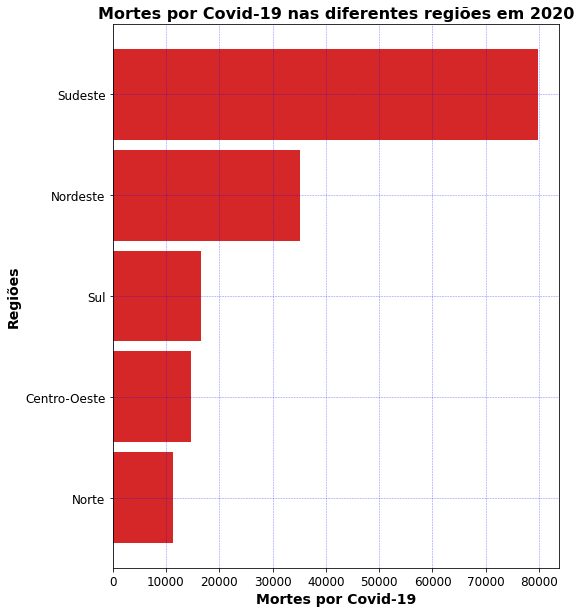

In [75]:
# primeiramente vamos plotar as mortes por Covid-19 para as diferentes regiões
plt.figure(figsize=(8,10))
############################### Plotar o gráfico ###############################
plt.barh(obitos_cart_regiao["region"], obitos_cart_regiao["deaths_covid19"], height = 0.9, color = "tab:red")

############################# Estética do gráfico ##############################

plt.title("Mortes por Covid-19 nas diferentes regiões em 2020", fontsize = 16, fontweight = "bold") # adiciona título
plt.xlabel("Mortes por Covid-19",fontsize = 14, fontweight = "bold") #nomeia x
plt.ylabel("Regiões",fontsize = 14, fontweight = "bold") #nomeia y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()

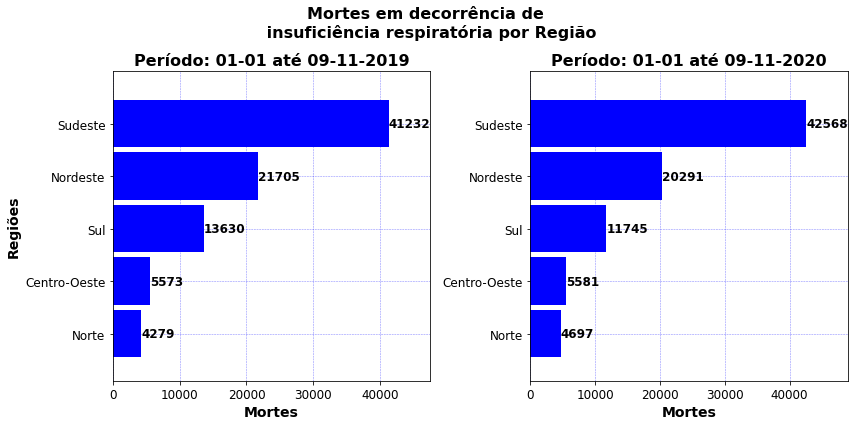

In [25]:
# 1) Figura lado a lado Mortes em decorrência de insuficiência respiratória por Estado Período: 01-01 até 09-11-2020
plotagem_barh_lado_a_lado(12,6,"Mortes em decorrência de \n insuficiência respiratória por Região",
                          obitos_cart_regiao["region"], obitos_cart_regiao["deaths_respiratory_failure_2019"],
                          "Período: 01-01 até 09-11-2019", "Mortes", "Regiões", 0, 1.15,
                          obitos_cart_regiao["region"], obitos_cart_regiao["deaths_respiratory_failure_2020"],
                          "Período: 01-01 até 09-11-2020", "Mortes", 0, 1.15, 0.83
                          )
plt.show()

In [26]:
# 1) Cálculo de aumento em 2020 (em porcentagem) Mortes em decorrência de insuficiência respiratória por Estado Período: 01-01 até 09-11-2020
# valor negativo portanto indica que teve queda
aumento_porc_insuficiencia_respiratoria_regiao = (100*obitos_cart_regiao["deaths_respiratory_failure_2020"]/obitos_cart_regiao["deaths_respiratory_failure_2019"])-100
aumento_porc_insuficiencia_respiratoria_regiao

0     9.768638
1     0.143549
2   -13.829787
3    -6.514628
4     3.240202
dtype: float64

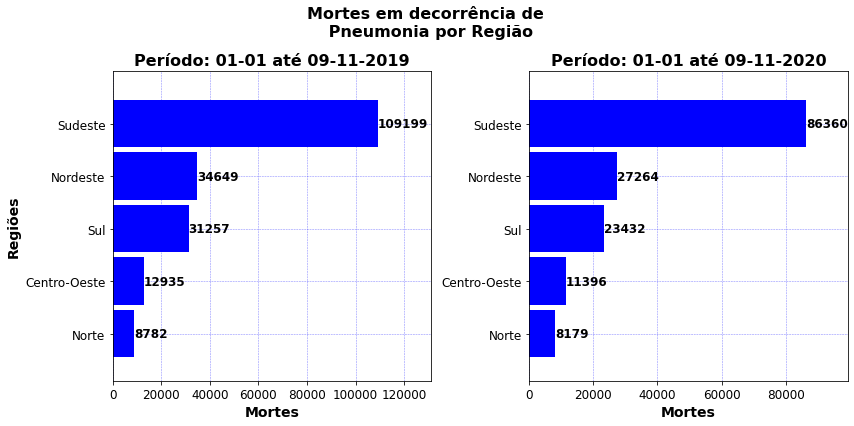

In [27]:
# 2) Figura lado a lado Mortes em decorrência de pneumonia por Região Período: 01-01 até 09-11-2020
plotagem_barh_lado_a_lado(12,6,"Mortes em decorrência de \n Pneumonia por Região",
                          obitos_cart_regiao["region"], obitos_cart_regiao["deaths_pneumonia_2019"],
                          "Período: 01-01 até 09-11-2019", "Mortes", "Regiões", 0, 1.2,
                          obitos_cart_regiao["region"], obitos_cart_regiao["deaths_pneumonia_2020"],
                          "Período: 01-01 até 09-11-2020", "Mortes", 0, 1.15, 0.83
                          )
plt.show()

In [28]:
# 2) Cálculo de aumento em 2020 (em porcentagem) Mortes em decorrência de pneumonia por Estado Período: 01-01 até 09-11-2020
aumento_porc_pneumonia_regiao = (100*obitos_cart_regiao["deaths_pneumonia_2020"]/obitos_cart_regiao["deaths_pneumonia_2019"])-100
aumento_porc_pneumonia_regiao

0    -6.866317
1   -11.897951
2   -25.034392
3   -21.313746
4   -20.915027
dtype: float64

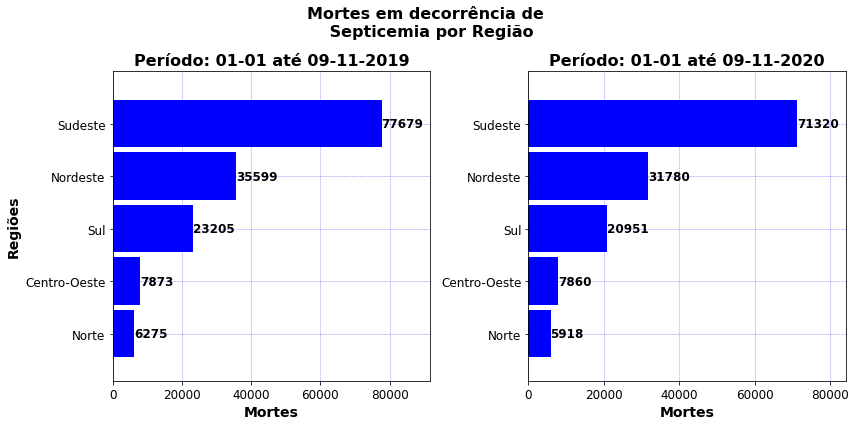

In [29]:
# 3) Figura lado a lado Mortes em decorrência de septicemia por Região Período: 01-01 até 09-11-2020
plotagem_barh_lado_a_lado(12,6,"Mortes em decorrência de \n Septicemia por Região",
                          obitos_cart_regiao["region"], obitos_cart_regiao["deaths_septicemia_2019"],
                          "Período: 01-01 até 09-11-2019", "Mortes", "Regiões", 0, 1.18,
                          obitos_cart_regiao["region"], obitos_cart_regiao["deaths_septicemia_2020"],
                          "Período: 01-01 até 09-11-2020", "Mortes", 0, 1.18, 0.83
                          )
plt.show()

In [30]:
# 3) Cálculo de aumento em 2020 (em porcentagem) Mortes em decorrência de septicemia por Estado Período: 01-01 até 09-11-2020
aumento_porc_septicemia_regiao = (100*obitos_cart_regiao["deaths_septicemia_2020"]/obitos_cart_regiao["deaths_septicemia_2019"])-100
aumento_porc_septicemia_regiao

0    -5.689243
1    -0.165121
2    -9.713424
3   -10.727829
4    -8.186254
dtype: float64

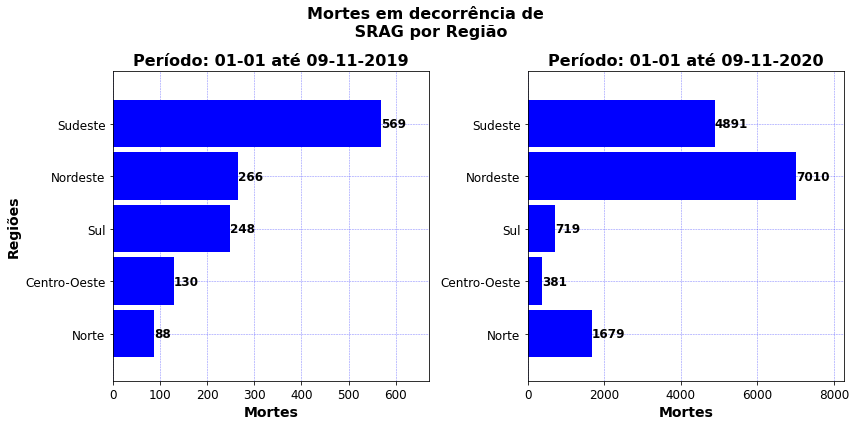

In [31]:
# 4) Figura lado a lado Mortes em decorrência Sars por Região Período: 01-01 até 09-11-2020
plotagem_barh_lado_a_lado(12,6,"Mortes em decorrência de \n SRAG por Região",
                          obitos_cart_regiao["region"], obitos_cart_regiao["deaths_sars_2019"],
                          "Período: 01-01 até 09-11-2019", "Mortes", "Regiões", 0, 1.18,
                          obitos_cart_regiao["region"], obitos_cart_regiao["deaths_sars_2020"],
                          "Período: 01-01 até 09-11-2020", "Mortes", 0, 1.18, 0.83
                          )
plt.show()

In [32]:
# 4) Cálculo de aumento em 2020 (em porcentagem) Mortes em decorrência de SRAG por Estado Período: 01-01 até 09-11-2020
aumento_porc_sars_regiao = (100*obitos_cart_regiao["deaths_sars_2020"]/obitos_cart_regiao["deaths_sars_2019"])-100
aumento_porc_sars_regiao

0    1807.954545
1     193.076923
2     189.919355
3    2535.338346
4     759.578207
dtype: float64

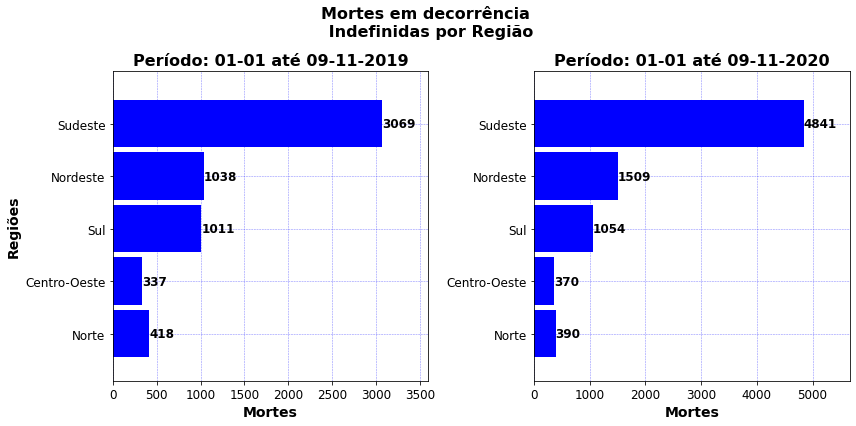

In [33]:
# 5) Figura lado a lado Mortes em decorrência Indefinida por Região Período: 01-01 até 09-11-2020
plotagem_barh_lado_a_lado(12,6,"Mortes em decorrência \n Indefinidas por Região",
                          obitos_cart_regiao["region"], obitos_cart_regiao["deaths_indeterminate_2019"],
                          "Período: 01-01 até 09-11-2019", "Mortes", "Regiões", 0, 1.17,
                          obitos_cart_regiao["region"], obitos_cart_regiao["deaths_indeterminate_2020"],
                          "Período: 01-01 até 09-11-2020", "Mortes", 0, 1.17, 0.83
                          )
plt.show()

In [34]:
# 5) Cálculo de aumento em 2020 (em porcentagem) Mortes em decorrência Indeterminada por Estado Período: 01-01 até 09-11-2020
aumento_porc_indeterminada_regiao = (100*obitos_cart_regiao["deaths_indeterminate_2020"]/obitos_cart_regiao["deaths_indeterminate_2019"])-100
aumento_porc_indeterminada_regiao

0    -6.698565
1     9.792285
2     4.253215
3    45.375723
4    57.738677
dtype: float64

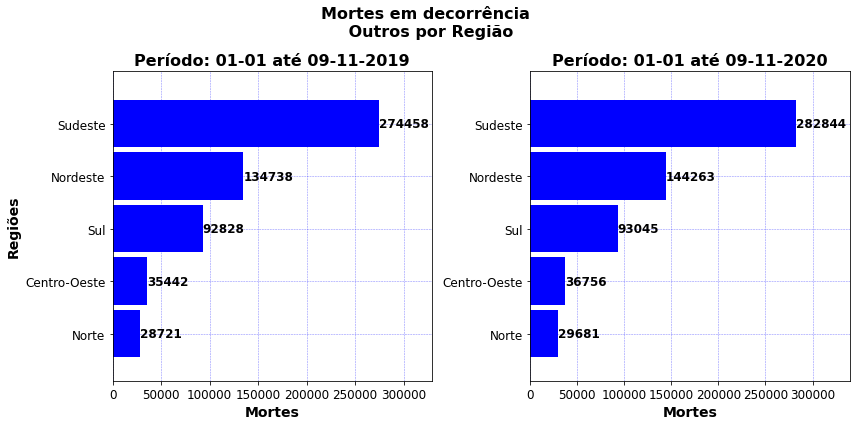

In [35]:
# 6) Figura lado a lado Mortes em decorrência de Outros por Região Período: 01-01 até 09-11-2020
plotagem_barh_lado_a_lado(12,6,"Mortes em decorrência \n Outros por Região",
                          obitos_cart_regiao["region"], obitos_cart_regiao["deaths_others_2019"],
                          "Período: 01-01 até 09-11-2019", "Mortes", "Regiões", 0, 1.2,
                          obitos_cart_regiao["region"], obitos_cart_regiao["deaths_others_2020"],
                          "Período: 01-01 até 09-11-2020", "Mortes", 0, 1.2, 0.83
                          )
plt.show()

In [36]:
# 6) Cálculo de aumento em 2020 (em porcentagem) Mortes em decorrência de Outros por Estado Período: 01-01 até 09-11-2020
aumento_porc_outros_regiao = (100*obitos_cart_regiao["deaths_others_2020"]/obitos_cart_regiao["deaths_others_2019"])-100
aumento_porc_outros_regiao

0    3.342502
1    3.707466
2    0.233766
3    7.069275
4    3.055477
dtype: float64

In [37]:
obitos_cart_regiao_copy = obitos_cart_regiao.copy()
obitos_cart_regiao_copy

,region,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020
0,Norte,418,4279,28721,8782,6275,88,11364,390,4697,29681,8179,5918,1679,48563,61908
1,Centro-Oeste,337,5573,35442,12935,7873,130,14636,370,5581,36756,11396,7860,381,62290,76980
2,Sul,1011,13630,92828,31257,23205,248,16545,1054,11745,93045,23432,20951,719,162179,167491
3,Nordeste,1038,21705,134738,34649,35599,266,35165,1509,20291,144263,27264,31780,7010,227995,267282
4,Sudeste,3069,41232,274458,109199,77679,569,79735,4841,42568,282844,86360,71320,4891,506206,572559


In [38]:
# Selecionando colunas do DataFrame dados_covid_região_copy apenas com as colunas que estou interessada em olhar
obitos_cart_regiao_copy = obitos_cart_regiao_copy[["region", "deaths_covid19", "deaths_total_2019","deaths_total_2020"]]
obitos_cart_regiao_copy.head(2)

,region,deaths_covid19,deaths_total_2019,deaths_total_2020
0,Norte,11364,48563,61908
1,Centro-Oeste,14636,62290,76980


In [ ]:
#inserindo no DataFrame o cálculo em porcentagem do aumento (queda, se negativo) de mortes de 2020 com relação a 2019
obitos_cart_regiao_copy["aumento_porc_insuficiencia_respiratoria_regiao"] = aumento_porc_insuficiencia_respiratoria_regiao
obitos_cart_regiao_copy["aumento_porc_pneumonia_regiao"] = aumento_porc_pneumonia_regiao
obitos_cart_regiao_copy["aumento_porc_septicemia_regiao"] = aumento_porc_septicemia_regiao
obitos_cart_regiao_copy["aumento_porc_sars_regiao"] = aumento_porc_sars_regiao
obitos_cart_regiao_copy["aumento_porc_indeterminada_regiao"] = aumento_porc_indeterminada_regiao
obitos_cart_regiao_copy["aumento_porc_outros_regiao"] = aumento_porc_outros_regiao

obitos_cart_regiao_copy.head()

In [40]:
obitos_cart_regiao_copy.head()

,region,deaths_covid19,deaths_total_2019,deaths_total_2020,aumento_porc_insuficiencia_respiratoria_regiao,aumento_porc_pneumonia_regiao,aumento_porc_septicemia_regiao,aumento_porc_sars_regiao,aumento_porc_indeterminada_regiao,aumento_porc_outros_regiao
0,Norte,11364,48563,61908,9.768638,-6.866317,-5.689243,1807.954545,-6.698565,3.342502
1,Centro-Oeste,14636,62290,76980,0.143549,-11.897951,-0.165121,193.076923,9.792285,3.707466
2,Sul,16545,162179,167491,-13.829787,-25.034392,-9.713424,189.919355,4.253215,0.233766
3,Nordeste,35165,227995,267282,-6.514628,-21.313746,-10.727829,2535.338346,45.375723,7.069275
4,Sudeste,79735,506206,572559,3.240202,-20.915027,-8.186254,759.578207,57.738677,3.055477


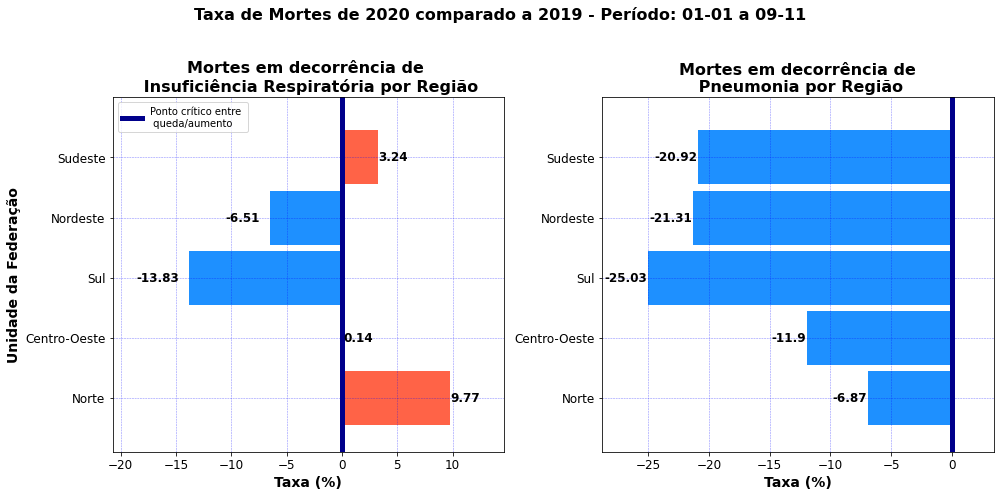

In [41]:
# Criando uma figura lado a lado de taxa de Mortes em decorrência de Insuficiência Respiratória e Pneumonia por Região Período: 01-01 até 09-11-2020

plotagem_barh_taxa(14,7,"Taxa de Mortes de 2020 comparado a 2019 - Período: 01-01 a 09-11",
                   obitos_cart_regiao_copy["region"], obitos_cart_regiao_copy["aumento_porc_insuficiencia_respiratoria_regiao"],
                   "Mortes em decorrência de \n Insuficiência Respiratória por Região",
                   "Taxa (%)","Unidade da Federação", 1.5, 1.5, 0.8,
                   obitos_cart_regiao_copy["region"], obitos_cart_regiao_copy["aumento_porc_pneumonia_regiao"],
                   "Mortes em decorrência de\n Pneumonia por Região", "Taxa (%)",
                   1.15, -0.5, 0.6, 0.80
                   )
plt.show()

Esta figura ilustra os valores em porcentagem da diminuição (valores negativos, barra em azul) ou aumento (valores positivos, barra em vermelho) do número de mortes em cada estado no ano de 2020 em comparação com o ano de 2019, a linha azul escuro é o ponto de inversão, ponto crítico entra queda -  aumento

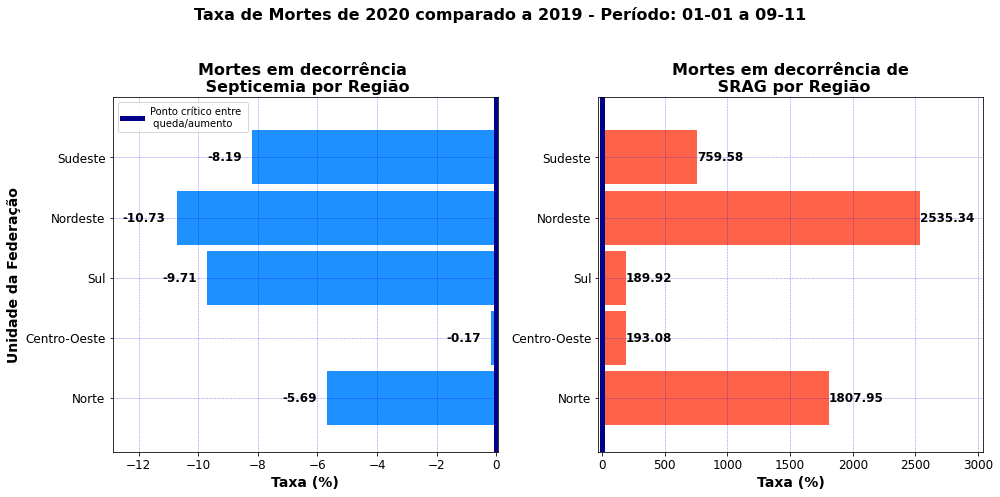

In [42]:
# Criando uma figura lado a lado taxa de mortes em decorrência de Septicemia e Sars por Região Período: 01-01 até 09-11-2020

plotagem_barh_taxa(14,7,"Taxa de Mortes de 2020 comparado a 2019 - Período: 01-01 a 09-11",
                   obitos_cart_regiao_copy["region"], obitos_cart_regiao_copy["aumento_porc_septicemia_regiao"],
                   "Mortes em decorrência \n Septicemia por Região",
                   "Taxa (%)","Unidade da Federação", 1.2, -0.3, 0.3,
                   obitos_cart_regiao_copy["region"], obitos_cart_regiao_copy["aumento_porc_sars_regiao"],
                   "Mortes em decorrência de\n SRAG por Região", "Taxa (%)",
                   -0.15, 1.2, 0.6, 0.80
                   )
plt.show()

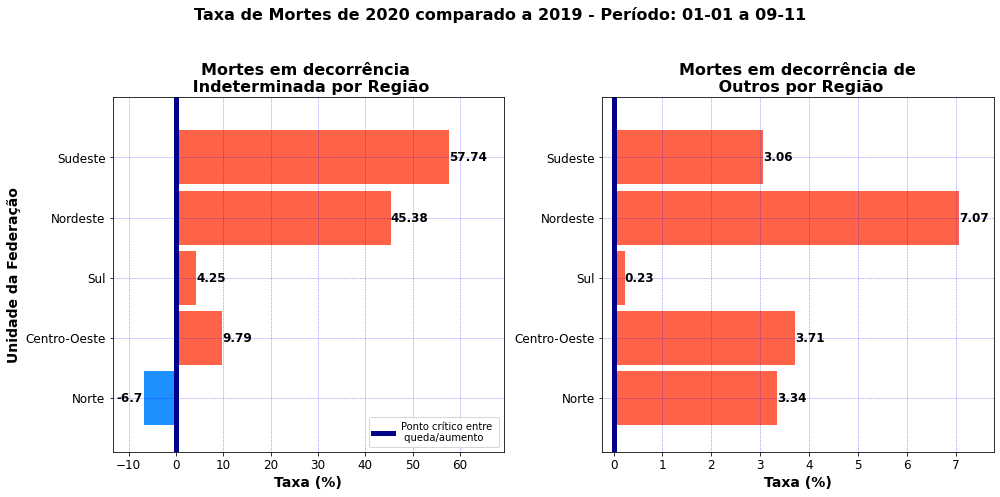

In [43]:
# Criando uma figura lado a lado de taxa de Mortes em decorrência de Indeterminada e outros por Região Período: 01-01 até 09-11-2020

plotagem_barh_taxa(14,7,"Taxa de Mortes de 2020 comparado a 2019 - Período: 01-01 a 09-11",
                   obitos_cart_regiao_copy["region"], obitos_cart_regiao_copy["aumento_porc_indeterminada_regiao"],
                   "Mortes em decorrência \n Indeterminada por Região",
                   "Taxa (%)","Unidade da Federação", 2, 1.2, 1.5,
                   obitos_cart_regiao_copy["region"], obitos_cart_regiao_copy["aumento_porc_outros_regiao"],
                   "Mortes em decorrência de\n Outros por Região", "Taxa (%)",
                   -1, 1.1, 0.17, 0.80
                   )
plt.show()

***
**OBSERVAÇÕES E ANÁLISES** sobre as regiões

***

Observe que todas as regiões tiveram um grande aumento de mortes por SRAG, Outros e Indeterminada (neste último a única exceção é para o Norte), porém, o Nordeste e o Norte apresentaram altíssimo aumento de SRAG, 2535% e 1807% respectivamente. Este valores podem, possivelmente, ser causados devido subnotificação de mortes devido a Covid-19.

***

### Explorando os dados por estado

Nesta seção será feito a mesma coisa que foi feito por região, porém, agora será analisado os estados. Visualização e taxa de aumento ou queda de mortes em 2020 com relação a 2019. Para diferentes causas: 
- 1) insuficiência respiratória
- 2) pneumonia
- 3) septicemia
- 4) sars
- 5) mortes indefinidas
- 6) outras

Depois de apresentados os GRÁFICOS - CÁLCULO DE TAXA irei colocar o cálculo deste taxa no DataFrame e plotar o gráficos das taxas para facilitar a discussão e conclusões

In [44]:
dados_obitos_copy.query("date == '2020-11-09'").shape

(27, 18)

In [45]:
dados_obitos_copy.query("date == '2020-11-09'").head(2)

,date,state,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,region
313,2020-11-09,AC,35,194,1662,735,356,4,704,34,211,1820,556,340,24,2986,3689,Norte
679,2020-11-09,AL,78,1346,8583,2251,1839,13,2136,83,1193,9309,1701,1849,283,14110,16554,Nordeste


In [46]:
#Morte acumuladas de dia 01-01 até dia 09-11, ordenadas pelo total de mortes por covid-19 ("deaths_covid19")
obitos_cart_estado = dados_obitos_copy.query("date == '2020-11-09'").sort_values("deaths_covid19")
obitos_cart_estado.head(2)

,date,state,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,region
7999,2020-11-09,RR,3,114,1061,422,272,3,612,4,110,1118,271,231,14,1875,2360,Norte
1411,2020-11-09,AP,11,208,1160,415,358,6,657,5,219,954,242,233,15,2158,2325,Norte


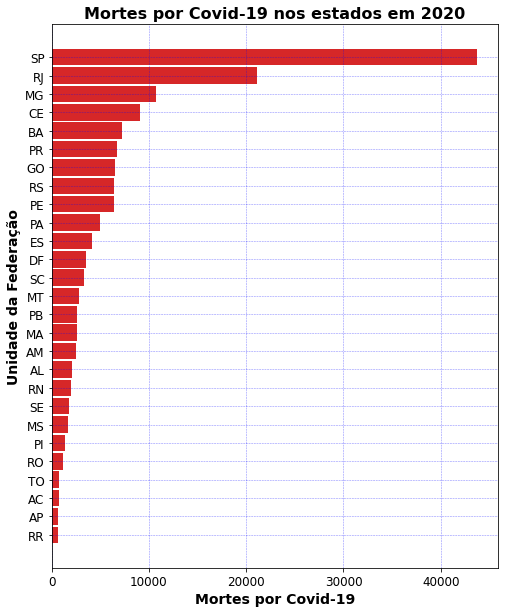

In [76]:
# primeiramente vamos plotar as mortes por Covid-19 para os diferentes estados
plt.figure(figsize=(8,10))
############################### Plotar o gráfico ###############################
plt.barh(obitos_cart_estado["state"], obitos_cart_estado["deaths_covid19"], height = 0.9, color = "tab:red")

############################# Estética do gráfico ##############################

plt.title("Mortes por Covid-19 nos estados em 2020", fontsize = 16, fontweight = "bold") # adiciona título
plt.xlabel("Mortes por Covid-19",fontsize = 14, fontweight = "bold") #nomeia x
plt.ylabel("Unidade da Federação",fontsize = 14, fontweight = "bold") #nomeia y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()

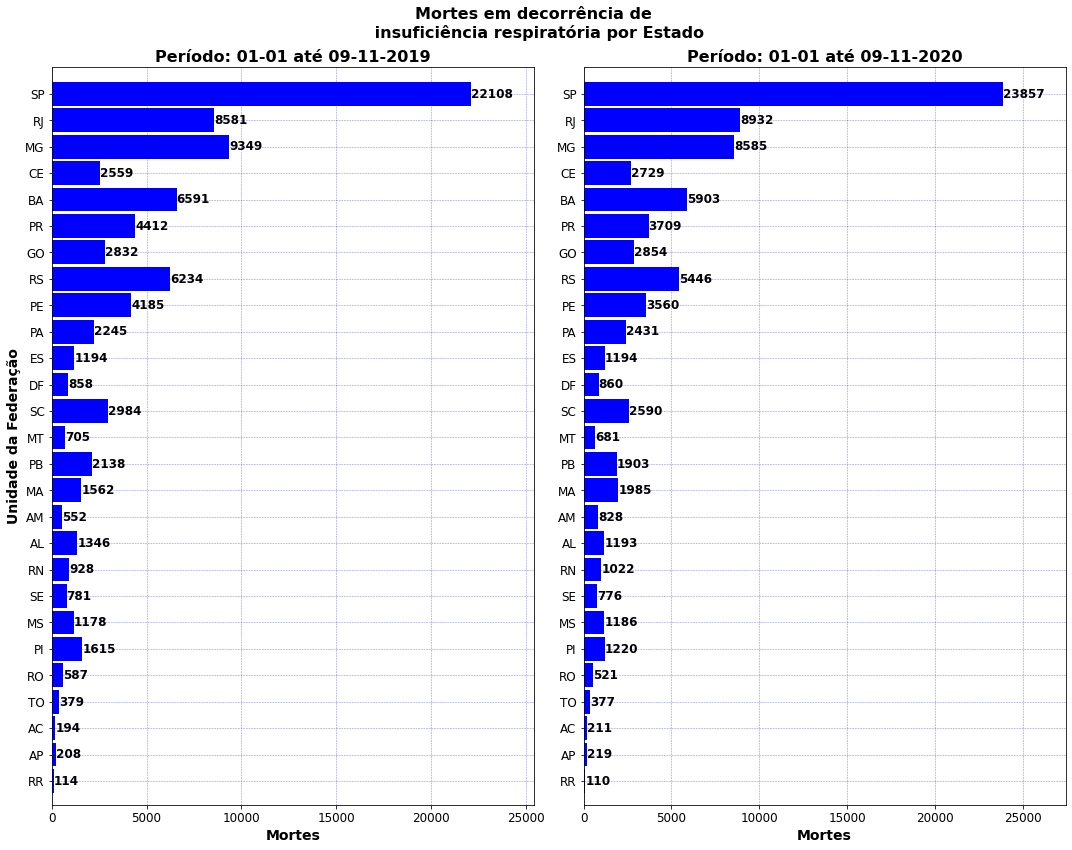

In [47]:
# 1) Figura lado a lado Mortes em decorrência de insuficiência respiratória por Estado Período: 01-01 até 09-11-2020
plotagem_barh_lado_a_lado(15,12,"Mortes em decorrência de \n insuficiência respiratória por Estado",
                          obitos_cart_estado["state"], obitos_cart_estado["deaths_respiratory_failure_2019"],
                          "Período: 01-01 até 09-11-2019", "Mortes", "Unidade da Federação", 0, 1.15,
                          obitos_cart_estado["state"], obitos_cart_estado["deaths_respiratory_failure_2020"],
                          "Período: 01-01 até 09-11-2020", "Mortes", 0, 1.15, 0.91
                          )
plt.show()

In [48]:
# 1) Cálculo de aumento em 2020 (em porcentagem) Mortes em decorrência de insuficiência respiratória por Estado Período: 01-01 até 09-11-2020
# valor negativo portanto indica que teve queda
aumento_porc_insuficiencia_respiratoria = (100*obitos_cart_estado["deaths_respiratory_failure_2020"]/obitos_cart_estado["deaths_respiratory_failure_2019"])-100
aumento_porc_insuficiencia_respiratoria.head(2)

7999   -3.508772
1411    5.288462
dtype: float64

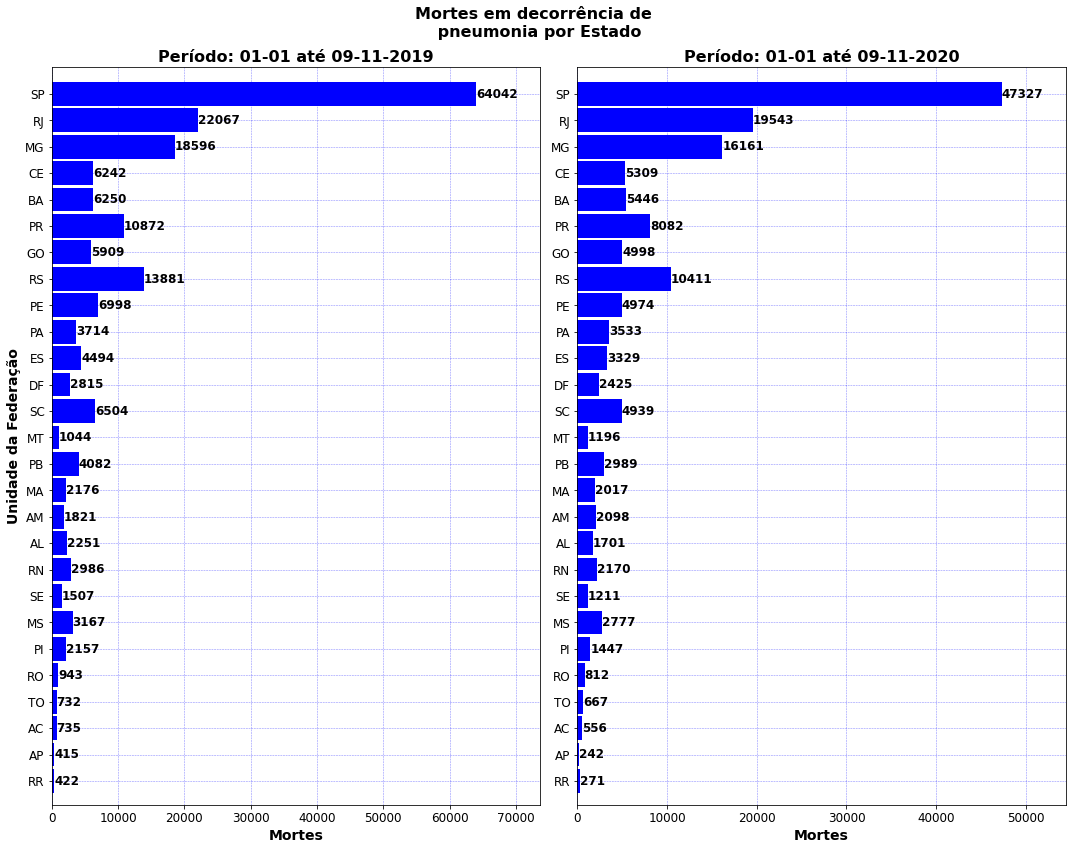

In [49]:
# 2) Figura lado a lado Mortes em decorrência de pneumonia por Estado Período: 01-01 até 09-11-2020
plotagem_barh_lado_a_lado(15,12,"Mortes em decorrência de \n pneumonia por Estado",
                          obitos_cart_estado["state"], obitos_cart_estado["deaths_pneumonia_2019"],
                          "Período: 01-01 até 09-11-2019", "Mortes", "Unidade da Federação", 0, 1.15,
                          obitos_cart_estado["state"], obitos_cart_estado["deaths_pneumonia_2020"],
                          "Período: 01-01 até 09-11-2020", "Mortes", 0, 1.15, 0.91
                          )
plt.show()

In [50]:
#2) Cálculo de aumento em 2020 (em porcentagem) Mortes em decorrência de pneumonia por Estado Período: 01-01 até 09-11-2020
aumento_porc_pneumonia = (100*obitos_cart_estado["deaths_pneumonia_2020"]/obitos_cart_estado["deaths_pneumonia_2019"])-100
aumento_porc_pneumonia.head(2)

7999   -35.781991
1411   -41.686747
dtype: float64

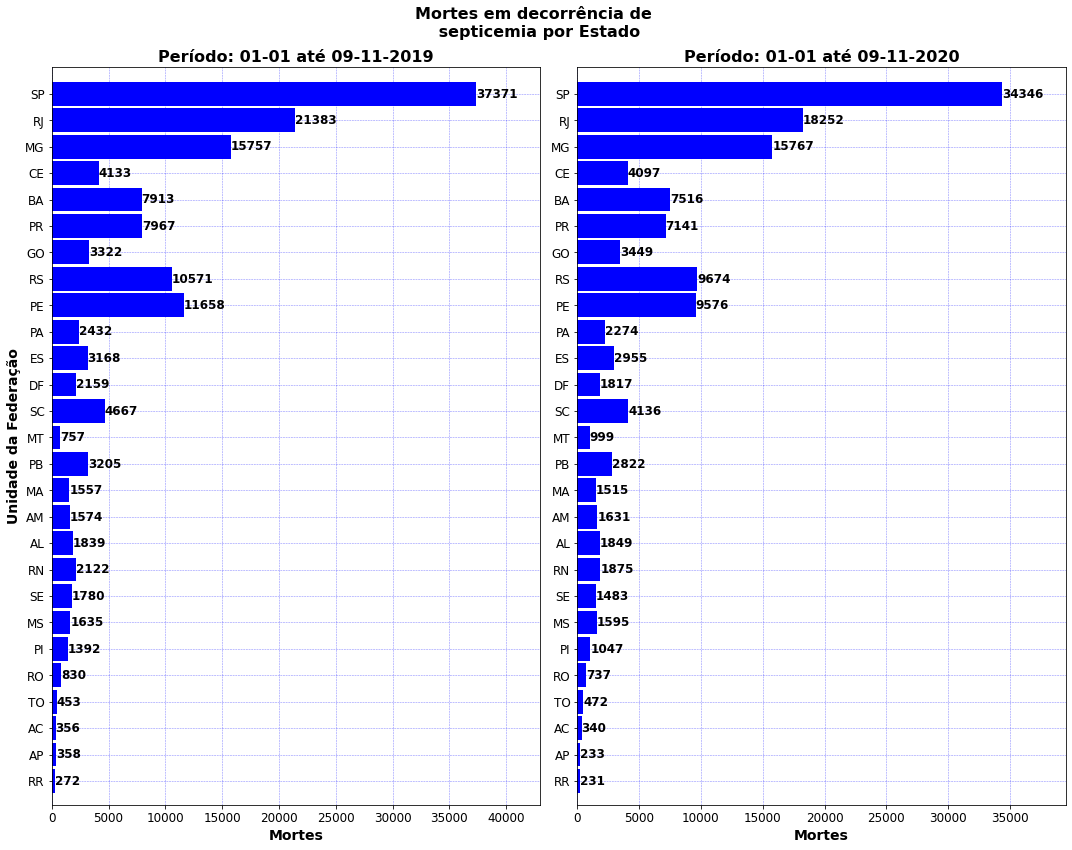

In [51]:
# 3) Figura lado a lado Mortes em decorrência de septicemia por Estado Período: 01-01 até 09-11-2020
plotagem_barh_lado_a_lado(15,12,"Mortes em decorrência de \n septicemia por Estado",
                          obitos_cart_estado["state"], obitos_cart_estado["deaths_septicemia_2019"],
                          "Período: 01-01 até 09-11-2019", "Mortes", "Unidade da Federação", 0, 1.15,
                          obitos_cart_estado["state"], obitos_cart_estado["deaths_septicemia_2020"],
                          "Período: 01-01 até 09-11-2020", "Mortes", 0, 1.15, 0.91
                          )
plt.show()

In [52]:
# 3) Cálculo de aumento em 2020 (em porcentagem) Mortes em decorrência de septicemia por Estado Período: 01-01 até 09-11-2020
aumento_porc_septicemia = (100*obitos_cart_estado["deaths_septicemia_2020"]/obitos_cart_estado["deaths_septicemia_2019"])-100
aumento_porc_septicemia.head(2)

7999   -15.073529
1411   -34.916201
dtype: float64

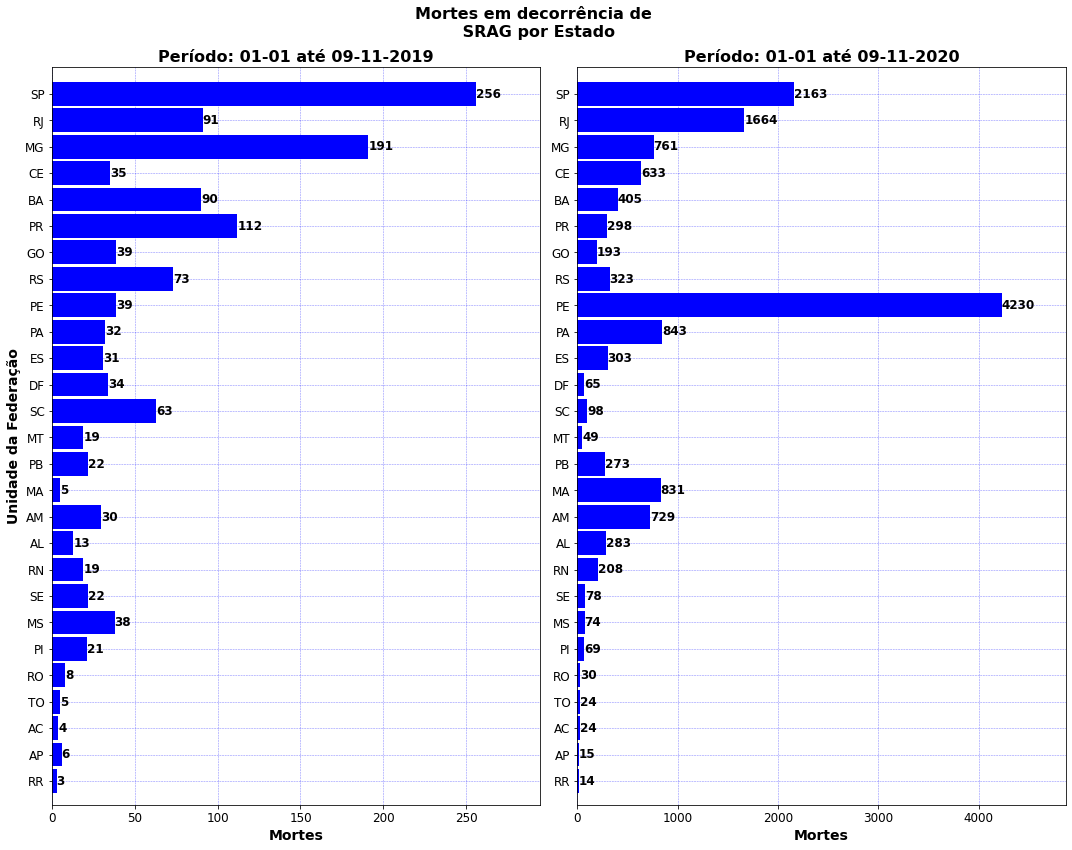

In [53]:
# 4) Figura lado a lado Mortes em decorrência de Sars por Estado Período: 01-01 até 09-11-2020

plotagem_barh_lado_a_lado(15,12,"Mortes em decorrência de \n SRAG por Estado",
                          obitos_cart_estado["state"], obitos_cart_estado["deaths_sars_2019"],
                          "Período: 01-01 até 09-11-2019", "Mortes", "Unidade da Federação", 0, 1.15,
                          obitos_cart_estado["state"], obitos_cart_estado["deaths_sars_2020"],
                          "Período: 01-01 até 09-11-2020", "Mortes", 0, 1.15, 0.91
                          )
plt.show()

In [54]:
# 4) Cálculo de aumento em 2020 (em porcentagem) Mortes em decorrência de septicemia por Estado Período: 01-01 até 09-11-2020
aumento_porc_sars = (100*obitos_cart_estado["deaths_sars_2020"]/obitos_cart_estado["deaths_sars_2019"])-100
aumento_porc_sars

7999      366.666667
1411      150.000000
313       500.000000
9829      380.000000
7633      275.000000
6169      228.571429
4339       94.736842
9097      254.545455
7267      994.736842
679      2076.923077
1045     2330.000000
3607    16520.000000
5437     1140.909091
4705      157.894737
8731       55.555556
2509       91.176471
2875      877.419355
5071     2534.375000
5803    10746.153846
8365      342.465753
3241      394.871795
6535      166.071429
1777      350.000000
2143     1708.571429
3973      298.429319
6901     1728.571429
9463      744.921875
dtype: float64

In [55]:
# assutada como o RJ e MA aumentaram absurdamente o número de casos de srag, impressionante não é?
obitos_cart_estado.tail(2)

,date,state,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,region
6901,2020-11-09,RJ,247,8581,66805,22067,21383,91,21110,1584,8932,66094,19543,18252,1664,119174,137179,Sudeste
9463,2020-11-09,SP,1203,22108,138222,64042,37371,256,43716,1572,23857,142842,47327,34346,2163,263202,295823,Sudeste


In [56]:
# 5) Cálculo de aumento em 2020 (em porcentagem) Mortes indeterminadas por Estado Período: 01-01 até 09-11-2020
aumento_porc_indeterminada = (100*obitos_cart_estado["deaths_indeterminate_2020"]/obitos_cart_estado["deaths_indeterminate_2019"])-100
display(aumento_porc_indeterminada.head(2))
print("\n")
# 6) Cálculo de aumento em 2020 (em porcentagem) Mortes outros por Estado Período: 01-01 até 09-11-2020
aumento_porc_outros = (100*obitos_cart_estado["deaths_others_2020"]/obitos_cart_estado["deaths_others_2019"])-100
display(aumento_porc_outros.head(2))

7999    33.333333
1411   -54.545455
dtype: float64

7999     5.372290
1411   -17.758621
dtype: float64

In [57]:
obitos_cart_estado_copy = obitos_cart_estado.copy()
obitos_cart_estado_copy.head(2)

,date,state,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,region
7999,2020-11-09,RR,3,114,1061,422,272,3,612,4,110,1118,271,231,14,1875,2360,Norte
1411,2020-11-09,AP,11,208,1160,415,358,6,657,5,219,954,242,233,15,2158,2325,Norte


***
Adicionar este cálculo da taxa de aumento de mortes em 2020 com relação a 2019 no DataFrame
***

In [58]:
# Selecionando colunas do DataFrame dados_covid_estados_copy apenas com as colunas que estou interessada em olhar
obitos_cart_estado_copy = obitos_cart_estado_copy[["date", "state", "deaths_covid19","deaths_total_2019","deaths_total_2020"]]
obitos_cart_estado_copy.head(2)

,date,state,deaths_covid19,deaths_total_2019,deaths_total_2020
7999,2020-11-09,RR,612,1875,2360
1411,2020-11-09,AP,657,2158,2325


In [59]:
#inserindo no DataFrame o cálculo em porcentagem do aumento (queda, se negativo) de mortes de 2020 com relação a 2019
obitos_cart_estado_copy["aumento_porc_insuficiencia_respiratoria"] = aumento_porc_insuficiencia_respiratoria
obitos_cart_estado_copy["aumento_porc_pneumonia"] = aumento_porc_pneumonia
obitos_cart_estado_copy["aumento_porc_septicemia"] = aumento_porc_septicemia
obitos_cart_estado_copy["aumento_porc_sars"] = aumento_porc_sars
obitos_cart_estado_copy["aumento_porc_indeterminada"] = aumento_porc_indeterminada
obitos_cart_estado_copy["aumento_porc_outros"] = aumento_porc_outros

obitos_cart_estado_copy.head(2)

,date,state,deaths_covid19,deaths_total_2019,deaths_total_2020,aumento_porc_insuficiencia_respiratoria,aumento_porc_pneumonia,aumento_porc_septicemia,aumento_porc_sars,aumento_porc_indeterminada,aumento_porc_outros
7999,2020-11-09,RR,612,1875,2360,-3.508772,-35.781991,-15.073529,366.666667,33.333333,5.372290
1411,2020-11-09,AP,657,2158,2325,5.288462,-41.686747,-34.916201,150.000000,-54.545455,-17.758621


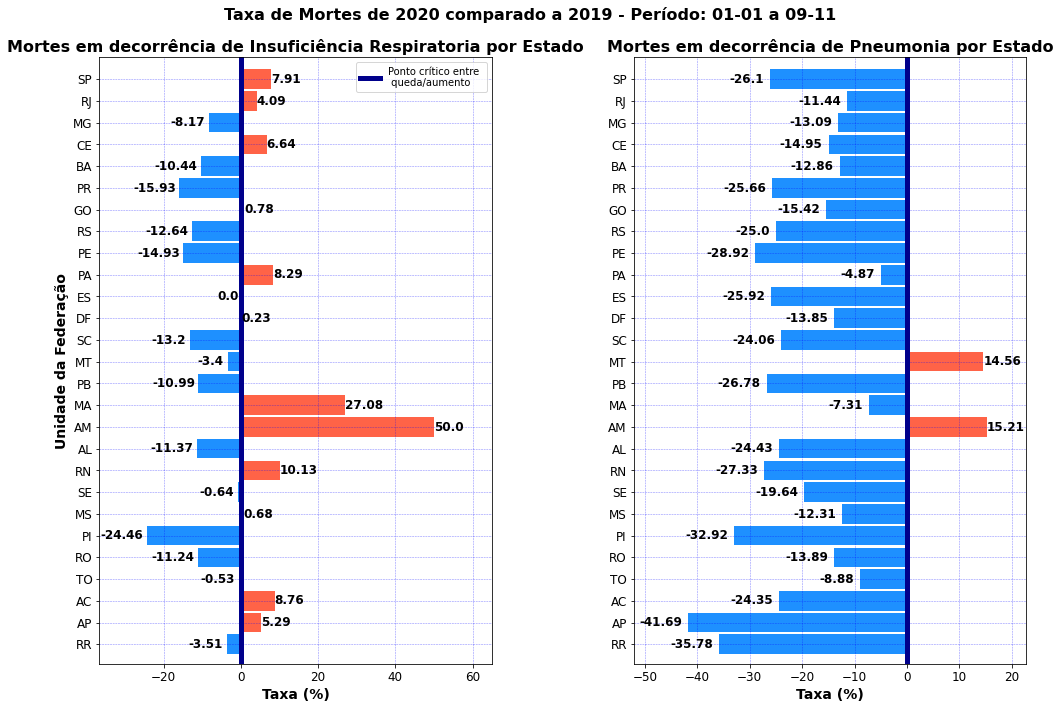

In [60]:
# Criando uma figura lado a lado Mortes em decorrência de Insuficiência Respiratória por Estado Período: 01-01 até 09-11-2020
plotagem_barh_taxa(15,10,"Taxa de Mortes de 2020 comparado a 2019 - Período: 01-01 a 09-11",
                   obitos_cart_estado_copy["state"], obitos_cart_estado_copy["aumento_porc_insuficiencia_respiratoria"],
                   "Mortes em decorrência de Insuficiência Respiratoria por Estado",
                   "Taxa (%)","Unidade da Federação", 1.5, 1.3, 2.0,
                   obitos_cart_estado_copy["state"], obitos_cart_estado_copy["aumento_porc_pneumonia"],
                   "Mortes em decorrência de Pneumonia por Estado", "Taxa (%)",
                   1.25, 1.50, 1.55, 0.91
                   )
plt.show()

*** 
**OBSERVAÇÕES E ALGUMAS CONCLUSÕES** Sobre a insuficiência respiratória e a pneumonia

***

A figura de mortes por insuficiência respiratória destaca o estado de AM e MA, estes estados tiveram um grande crescimento com relação ao ano de 2019.
É sabido que o Covid-19 pode levar a pneumonia e a insuficiência respiratória [17].

Além disto, mortes por pneumonia mostra MT e AM tiveram um aumento próximo a 15% com relação ao ano de 2019. Pelos dados analisados pneumonia e septicemia (que virá a seguir) foram as únicas delas que tiveram uma leve queda em quase todos os estados. Porém esta queda não comparável ao aumento de outras doenças respiratórias como veremos no gráfico de SRAG. 

[17] Diogo Sponchiato. Por que o coronavírus pode levar a sintomas graves, complicações e mortes. Veja Saúde, 17 ago. 2020. Disponível em  https://saude.abril.com.br/medicina/coronavirus-complicacoes-mortes/ Acesso em: 20 nov. 2020

***

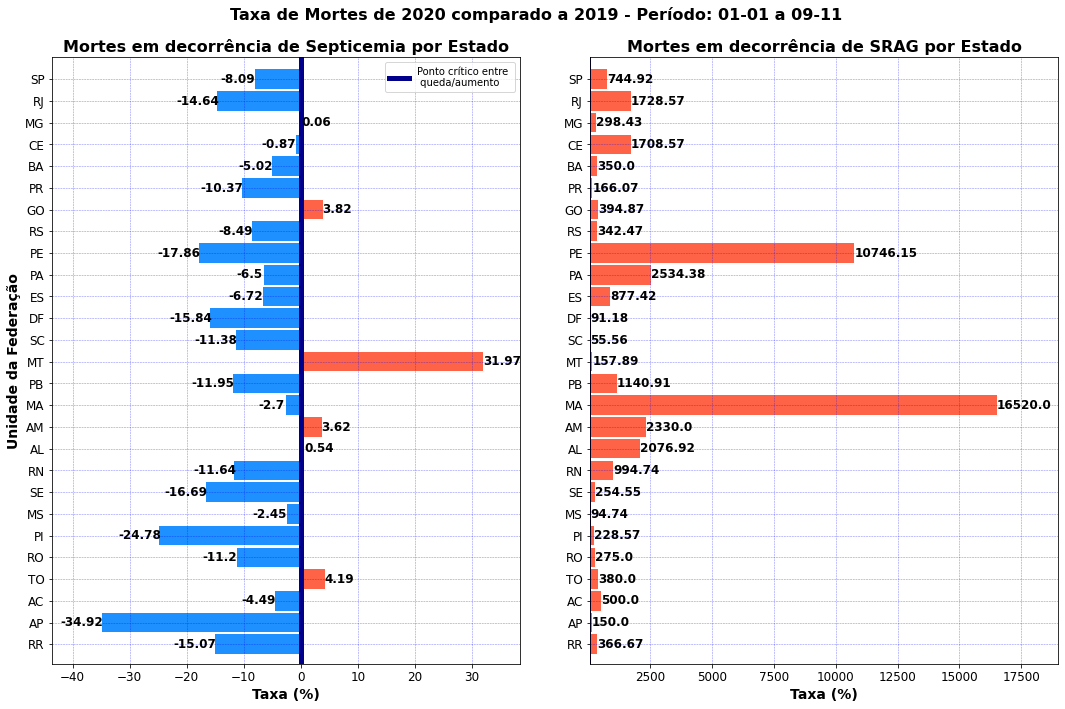

In [61]:
# Criando uma figura lado a lado Mortes em decorrência de Sars por Estado Período: 01-01 até 09-11-2020
plotagem_barh_taxa(15,10,"Taxa de Mortes de 2020 comparado a 2019 - Período: 01-01 a 09-11",
                   obitos_cart_estado_copy["state"], obitos_cart_estado_copy["aumento_porc_septicemia"],
                   "Mortes em decorrência de Septicemia por Estado",
                   "Taxa (%)","Unidade da Federação", 1.25, 1.2, 1.2,
                   obitos_cart_estado_copy["state"], obitos_cart_estado_copy["aumento_porc_sars"],
                   "Mortes em decorrência de SRAG por Estado", "Taxa (%)",
                   1.25, 1.15, 1.2, 0.91
                   )
plt.show()

*** 
**OBSERVAÇÕES E ALGUMAS CONCLUSÕES** Sobre a septicemia 

***

A figura de mortes por septicemia destaca o estado de MT, teve um crescimento anormal com relação ao ano de 2019. Estudos reportaram que possivelmente a Covid-19 pode causar um processo inflamatório semelhante ao da sepse [18], tendo a possibilidade da Covid-19 ser um dos fatores deste aumento.

Na sequência será analisada a figura de mortes por SRAG

[18] Fernando de Queiroz Cunha. A Covid-19 pode gerar um processo inflamatório semelhante ao causado pela sepse. Revista Pesquisa Fapesp, 14 jun. 2020. Disponível em: https://revistapesquisa.fapesp.br/a-covid-19-pode-gerar-um-processo-inflamatorio-semelhante-ao-causado-pela-sepse/ Acesso em: 20 nov. 2020

***

In [62]:
maranhao_ate_abril = dados_obitos_copy.query("date == '2020-04-30'").query("state == 'MA'")
maranhao_ate_abril

,date,state,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,region
3414,2020-04-30,MA,46,593,4103,871,610,1,237,55,761,4666,956,575,150,6224,7400,Nordeste


In [63]:
#cálculo sobre a taxa de aumento do Maranhão - Abril
aumento_porc_sars_maranhão = (100*maranhao_ate_abril["deaths_sars_2020"]/maranhao_ate_abril["deaths_sars_2019"])-100
aumento_porc_sars_maranhão

3414    14900.0
dtype: float64

In [64]:
#reportagem (da discussão abaixo) sobre Maranhão em Abril
aumento_porc_sars1 = (100*275/3)-100
aumento_porc_sars1

9066.666666666666

*** 
**OBSERVAÇÕES E ALGUMAS CONCLUSÕES** Sobre o SRAG 

***

Em maio o Maranhão foi notícia [19] mostrando que houve um crescimento no comparativo entre os meses de abril de 2019 e de 2020 de 9067%. Os dados levantados para esta reportagem tomaram como base os dados da Secretaria de Estado de Saúde (SES) onde é reportado no mês de abril de 2019 3 mortes e no mês de abril de 2020, 275 mortes. Tiveram outras reportagem semelhantes [20] que mostra o mesmo crescimento usando a mesma base de dados.  

Utilizando a base de dados do Brasil-IO (que está sendo analisada neste projeto) esta base tem dados de óbitos registrados nos cartórios e disponíveis no Portal da Transparência do Registro Civil, foi feito um comparativo entre ela e os dados  da reportagem [19], foi analisado e calculado o percentual de aumento. Para esta base até o último dia de abril para o ano de 2019 tive 1 morte e em 2020, 150 mortes por sars que é a (Quantidade de óbitos em decorrência de SRAG), o que resultaria em um aumento de 14900%, distoando das referencias encontradas. Desta forma, seria interessante tentar encontrar outra base de dados para poder inferir melhor sobre a estimativa.

Apesar desta diferença observada deste estudo com as reportagens referenciadas é interesante observar que o MA é um estado muito crítico em inflação dos dados de SRAG - Síndrome Respiratória Aguda Grave. 

É de se esperar mesmo que a taxa de infeção do MA é uma das maiores do mundo [21]. 


Além do Maranhão, vários outros estados com um aumento alarmante destes números como PE, AM, AL, RJ, CE. Este enorme aumento do número de mortes por SRAG é uma consequência direta do Covid-19.

[19] Rafaelle Fróes. Número de mortes por Síndrome Respiratória Aguda Grave crescem 9.067% no Maranhão, G1 MA, 11 mai. 2020. Disponível em:  https://g1.globo.com/ma/maranhao/noticia/2020/05/11/numero-de-mortes-por-sindrome-respiratoria-aguda-grave-crescem-9067percent-no-maranhao.ghtml Acesso em: 19 nov. 2020

[20] No Maranhão, mortes por Síndrome Respiratória Aguda Grave aumentam 9.067%, iG, 11 mai. 2020. Disponível em: https://ultimosegundo.ig.com.br/brasil/2020-05-11/no-maranhao-mortes-por-sindrome-respiratoria-aguda-grave-aumentam-9067.html Acesso em: 19 nov. 2020 

[21] Bruna Monteiro Tavares. Taxa de infecção pelo Sars-CoV-2 do Maranhão é a maior relatada no mundo inteiro, diz especialista, O Imparcial, 28 ago. 2020. Disponível em: https://oimparcial.com.br/saude/2020/08/taxa-de-infeccao-pelo-novo-coronavirus-do-maranhao-e-a-maior-relatada-no-mundo-inteiro-diz-especialista/ Acesso em: 19 nov. 2020 
***

In [66]:
obitos_cart_estado_copy.head(2)

,date,state,deaths_covid19,deaths_total_2019,deaths_total_2020,aumento_porc_insuficiencia_respiratoria,aumento_porc_pneumonia,aumento_porc_septicemia,aumento_porc_sars,aumento_porc_indeterminada,aumento_porc_outros
7999,2020-11-09,RR,612,1875,2360,-3.508772,-35.781991,-15.073529,366.666667,33.333333,5.372290
1411,2020-11-09,AP,657,2158,2325,5.288462,-41.686747,-34.916201,150.000000,-54.545455,-17.758621


In [ ]:
# Criando uma figura lado a lado Mortes em decorrência de Sars por Estado Período: 01-01 até 09-11-2020

plotagem_barh_taxa(15,10,"Taxa de Mortes de 2020 comparado a 2019 - Período: 01-01 a 09-11",
                   obitos_cart_estado_copy["state"], obitos_cart_estado_copy["aumento_porc_indeterminada"],
                   "Mortes em decorrência Indeterminada por Estado",
                   "Taxa (%)","Unidade da Federação", 2.4, 1.15, 11.5,
                   obitos_cart_estado_copy["state"], obitos_cart_estado_copy["aumento_porc_outros"],
                   "Mortes em decorrência de Outros por Estado", "Taxa (%)",
                   1.21, 1.2, 0.6, 0.91
                   )
plt.show()

*** 
**OBSERVAÇÕES E ALGUMAS CONCLUSÕES** Sobre morte Interminada e Outros

***

Observe que morte em decorrência Interminada o RJ teve um grande aumento de 541% com relação a 2019, na sequência PE com 96%, MT com 63%, MA com 55%
O gráfico de mortes em decorrência de Outros aumentaram em comparação com o ano de 2019, com exceção de RJ, RS, SE, PI e AP. Os três que mais se destacaram foram o MA com um aumento de 13%, o CE de 11.6% e AC de 9.51. Este grande aumento possivelmente é causado pelo subnotificação de mortes devido a Covid-19.

***

*** 
**ALGUMAS CONCLUSÕES**

***

Aqui reforçamos a hipótese de subnotificações, é evidente que houve um grande aumento de mortes em 2020 por doenças respiratória e mortes que não foram determinadas as causas, há uma grande possibilidade destas mortes serem causadas pela Covid-19 e não terem entrado nas estatísticas oficiais de mortes causadas pelo vírus covid-19. Buscando mais reportagens é fácil encontrar sobre este tema a subnotificação vem sendo notícia ao longo de toda a pandemia como mostra este reportagem de junho do conselho federal de enfermagem [22].

A falta de testagem pode ter sido uma das causas destas possíveis subnotificações. Resultando em um cenário ainda mais caótico, impossibilitando a rápida ação de medidas efetivas para o melhor enfrentamento deste crise que estamos vivendo.

[22] Explosão de mortes por causa respiratória indicam subnotificação de covid-19, Conselho Federal de Enfermagem, 11 jun. 2020. Disponível em: http://www.cofen.gov.br/explosao-de-mortes-por-sindrome-respiratoria-indicam-subnotificacao-de-covid-19_80544.html Acesso em: 20 nov. 2020

***

# SUGESTÃO DE ANÁLISES ADICIONAIS

- Buscar outra base de dados de SRAG (casos confirmados e mortes mortes) para fins compartivos.
- Buscar uma base de dados que tenha SRAG com a faixa de renda da pessoa infectada/morta.

# *CONCLUSÃO*

Concluí-se que há um real e grande problema de subnotificações de Covid-19, em destaque para o estado do Rio de Janeiro que apresenta alta taxa de letalidade, 7,5%, seguido por Pernambuco, 6,2%, além disto, a falta de lançamento de dados por estados em dias específicos, destaque o Rio Grande do Norte que, com salva exceção, não lançou os dados aos sábados em agosto, setembro e outubro, além disto, houve um grande aumento de mortes em 2020 por doenças respiratória e mortes que não foram determinadas as causas (indeterminadas e Outros), há uma grande possibilidade destas mortes serem causadas pela Covid-19, como vimos na discussão dos dados, e não terem entrado nas estatísticas oficiais de mortes causadas pelo vírus Covid-19, o aumento de número de mortes em 2020 por síndrome respiratória aguda grave em relação a 2019 com grande destaque para os estados de Maranhão (aumento de 16520% de aumento de SRAG), Pernambuco (10746%), Pará (2534%), observe que é um aumento de milhares por cento, é realmente um valor muito expressivo.

Todo este estudo indica uma possível e extremamente provavel subnotificação, devido a falta de testagens que esconde dados reais de Covid-19 e dificultando o enfrentamento do problema de forma mais adaptada e adequada a cada estado. E claro como já observado que há outros inúmeros fatores não excludentes que podem ser levados em consideração, como condições de leitos de hospitais, fatores socioeconômicos como as condições de residência que talvez impeçam de fazer a quarentena de forma devida, possibilidade de trabalho presencial e/ou remoto, fatores de idade média da população e também obesidade. 
Pessoas obesas com relação a pessoas normais podem  aumentar em 113% as chance de precisar de internação 74% de precisar de UTI e em 48% o risco de morte. [14][15]. Além do importante uso de máscara e distanciamento social que muitas vezes é desrespeitado, experimentos mostraram que o distanciamento social e o uso da máscara são pontos extremamente importante e fundamentais para reduzir o risco de transmissão entre as pessoas do vírus, um destes experimento é de um grupo de japoneses [23].

Em conclusão, quero destacar um ponto não levantado ao longo do texto mas é o da importância em fazer ciência, valorizar o cientista e dar e ser mais voz, divulgar a ciência é tão fundamental quanto sobreviver, pois, enquanto isto, surgiram novos vírus, isto é previsível, talvez menos contagiosos como este caso que surgiu na Bolívia recentemente [24] ou tão contagiosos como o Covid-19, o fato é que como cientista seja ele de dados, das exatas, biológicas, sociais, devemos ser voz, seja para um cliente ou para uma sociedade.

>"*A frase de Eugene Wigner parece ser mais necessária agora do que em sua época; precisamos sempre redescobrir a ciência, como ela funciona, suas múltiplas facetas de formação, seus valores e as histórias de cientistas que se tornam grandes, mas às vezes escondidos, até que são finalmente descobertos...*" [25]

[23] Dhruv Kumar - Covid-19. Youtube. Disponível em: https://www.youtube.com/watch?v=K5kR1zhVjAc&t=3s Acesso em: 31 mar. 2020

[24] Alessandra Corrêa, O que se sabe sobre o novo vírus Chapare, causador de febre fatal com transmissão entre humanos, BBC News Brasil, 18 nov. 2020. Disponível em: https://www.bbc.com/portuguese/internacional-54984528 Acesso em: 22 nov. 2020

[25] Peter Schulz, Pequenas histórias de vírus, cientistas e ciência, Jornal de Unicamp online, 13 nov. 2020. Disponível em: https://www.unicamp.br/unicamp/ju/artigos/peter-schulz/pequenas-historias-de-virus-cientistas-e-ciencia  Acesso em: 14 nov. 2020

# *REFERÊNCIAS*

[1] Disponível em: https://brasil.io/dataset/covid19/caso/ Acesso em: 09 Nov. 2020

[2] Disponível em: https://brasil.io/dataset/covid19/obito_cartorio/ Acesso em: 19 Nov. 2020 

[3] Disponível em: https://github.com/turicas/covid19-br/blob/master/api.md#%C3%B3bitos-registrados-em-cart%C3%B3rio Acesso em: 19 nov. 2020

[4] Mônica Bergamo. Hospitais privados de SP voltam a ter salto de internação por Covid-19. Folha de São Paulo, 9 nov.2020. Disponível em: https://www1.folha.uol.com.br/colunas/monicabergamo/2020/11/hospitais-privados-de-sp-voltam-a-ter-salto-de-internacao-por-covid-19.shtml Acesso em: 13 nov. 2020

[5] Wandy Ribeiro, COVID-19: BRASIL PODE ESTAR NO PLATÔ POR FALTA DE TESTES, ICTQ. Disponível em: https://www.ictq.com.br/farmacia-clinica/1685-covid-19-brasil-pode-estar-no-plato-por-falta-de-testes Acesso em: 13 nov. 2020

[6] Mateus Parreiras. Descompasso de dados sugere ampla subnotificação da COVID-19 em Minas. Estado de Minas Gerais, 20 ago. 2020. Disponível em: https://www.em.com.br/app/noticia/gerais/2020/08/20/interna_gerais,1177700/descompasso-de-dados-sugere-ampla-subnotificacao-da-covid-19-em-minas.shtml Acesso em: 13 nov. 2020

[7] Machado da Costa. Brasil sofre seu maior ataque hacker da história. Veja, 05 nov.2020. Disponível em: https://veja.abril.com.br/blog/radar-economico/brasil-sofre-seu-maior-ataque-hacker-da-historia/ Acesso em: 19 nov. 2020

[8] Ferraz Jr. Brasil tem os mais baixos índices de testagem da covid-19 no mundo. Jornal da USP, 14 jul. 2020. Disponível em: https://jornal.usp.br/atualidades/brasil-tem-os-mais-baixos-indices-de-testagem-da-covid-19-no-mundo/ Acesso em: 12 nov. de 2020

[9] Com 90% dos leitos de UTI para Covid-19 ocupados no Hospital Geral, RR chega a 59.189 casos. G1 RR, 8 nov. 2020. Disponível em: https://g1.globo.com/rr/roraima/noticia/2020/11/08/com-90percent-dos-leitos-de-uti-para-covid-19-ocupados-no-hospital-de-geral-rr-chega-a-59189-casos.ghtml Acesso em: 13 nov. 2020

[10] Wikipédia. Disponível em: https://pt.wikipedia.org/wiki/Taxa_de_letalidade Acesso em: 21 nov. 2020

[11] PH de Noronha. Letalidade por Covid-19 no Rio está acima da média mundial,Portal FioCruz, 01 set. 2020. Disponível em: https://portal.fiocruz.br/noticia/letalidade-por-covid-19-no-rio-esta-acima-da-media-mundial#:~:text=Para%20efeito%20de%20compara%C3%A7%C3%A3o%2C%20a,as%20m%C3%A9dias%20brasileira%20e%20mundial. Acesso em: 20 nov. 2020

[12] Prado, et al. Análise da subnotificação de COVID-19 no Brasil, Rev Bras Ter Intensiva. 32(2):224-228, 2020. Disponível em: https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0103-507X2020000200224, Acesso em: 17 nov. 2020

[13] Vinícius Lemos e Luis Barrucho. Brasil chega a 150 mil mortes por covid-19, mas número real pode ser muito maior. BBC News Brasil, 10 out. 2020. Disponível em: https://www.bbc.com/portuguese/brasil-54478219, Acesso em: 17 nov. 2020

[14] Léo Ramos Chaves. Obesidade pode agravar Covid-19, Revista Pesquisa Fapesp, out. 2020. Disponível em: https://revistapesquisa.fapesp.br/obesidade-pode-agravar-covid-19/ Acesso em: 20 nov. 2020

[15] Covid-19: obesidade é fator de risco tão importante quanto ser idoso para agravamento e morte pela doença. Fapesp na Mídia, 17 set. 2020. Disponível em: https://namidia.fapesp.br/covid-19-obesidade-e-fator-de-risco-tao-importante-quanto-ser-idoso-para-agravamento-e-morte-pela-doenca/247216 Acesso em: 20 nov. 2020

[16] Agência O Globo. Dados apontam subnotificação da covid-19 nas favelas do Rio. Exame, 5 jul. 2020. Disponível em: https://exame.com/brasil/dados-apontam-subnotificacao-da-covid-19-nas-favelas-do-rio/ Acesso em: 20 nov. 2020

[17] Diogo Sponchiato. Por que o coronavírus pode levar a sintomas graves, complicações e mortes. Veja Saúde, 17 ago. 2020. Disponível em  https://saude.abril.com.br/medicina/coronavirus-complicacoes-mortes/ Acesso em: 20 nov. 2020

[18] Fernando de Queiroz Cunha. A Covid-19 pode gerar um processo inflamatório semelhante ao causado pela sepse. Revista Pesquisa Fapesp, 14 jun. 2020. Disponível em: https://revistapesquisa.fapesp.br/a-covid-19-pode-gerar-um-processo-inflamatorio-semelhante-ao-causado-pela-sepse/ Acesso em: 20 nov. 2020

[19] Rafaelle Fróes. Número de mortes por Síndrome Respiratória Aguda Grave crescem 9.067% no Maranhão, G1 MA, 11 mai. 2020. Disponível em:  https://g1.globo.com/ma/maranhao/noticia/2020/05/11/numero-de-mortes-por-sindrome-respiratoria-aguda-grave-crescem-9067percent-no-maranhao.ghtml Acesso em: 19 nov. 2020

[20] No Maranhão, mortes por Síndrome Respiratória Aguda Grave aumentam 9.067%, iG, 11 mai. 2020. Disponível em: https://ultimosegundo.ig.com.br/brasil/2020-05-11/no-maranhao-mortes-por-sindrome-respiratoria-aguda-grave-aumentam-9067.html Acesso em: 19 nov. 2020 

[21] Bruna Monteiro Tavares. Taxa de infecção pelo Sars-CoV-2 do Maranhão é a maior relatada no mundo inteiro, diz especialista, O Imparcial, 28 ago. 2020. Disponível em: https://oimparcial.com.br/saude/2020/08/taxa-de-infeccao-pelo-novo-coronavirus-do-maranhao-e-a-maior-relatada-no-mundo-inteiro-diz-especialista/ Acesso em: 19 nov. 2020 

[22] Explosão de mortes por causa respiratória indicam subnotificação de covid-19, Conselho Federal de Enfermagem, 11 jun. 2020. Disponível em: http://www.cofen.gov.br/explosao-de-mortes-por-sindrome-respiratoria-indicam-subnotificacao-de-covid-19_80544.html Acesso em: 20 nov. 2020

[23] Dhruv Kumar - Covid-19. Youtube. Disponível em: https://www.youtube.com/watch?v=K5kR1zhVjAc&t=3s Acesso em: 31 mar. 2020

[24] Alessandra Corrêa, O que se sabe sobre o novo vírus Chapare, causador de febre fatal com transmissão entre humanos, BBC News Brasil, 18 nov. 2020. Disponível em: https://www.bbc.com/portuguese/internacional-54984528 Acesso em: 22 nov. 2020

[25] Peter Schulz, Pequenas histórias de vírus, cientistas e ciência, Jornal de Unicamp online, 13 nov. 2020. Disponível em: https://www.unicamp.br/unicamp/ju/artigos/peter-schulz/pequenas-historias-de-virus-cientistas-e-ciencia  Acesso em: 14 nov. 2020

[26] Andrei Teleron. Cleaning Missing Values in a Pandas Dataframe. Towards Data Science, 09 nov. 2019. Disponível em: https://towardsdatascience.com/cleaning-missing-values-in-a-pandas-dataframe-a88b3d1a66bf Acesso em: 09 Nov 2020 as 15:20